# --Training--

# Data Preparation

In [1]:
# reading sampling
import pandas as pd
import gc

samp = pd.read_csv("Dataset/sampling_healtkathon2022.csv")
samp

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,...,184300.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,...,10628400.0,1.0,D-4-13-III,1,None,None,None,None,None,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,...,381600.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401877,9983563,8527704,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,...,3645100.0,1.0,P-8-17-I,3,None,None,None,None,None,0
11401878,11053870,8527709,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,...,12273200.0,1.0,P-8-13-II,2,None,None,None,None,None,0
11401879,7461049,8527751,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,...,4099000.0,1.0,P-8-08-I,3,None,None,None,None,None,0
11401880,1075162,8527853,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,...,3992400.0,1.0,P-8-08-I,3,None,None,None,None,None,0


In [2]:
# reading proc
proc = pd.read_csv("dataset/sampling_healthkathon2022_procedure.csv")
proc

,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78
...,...,...
12202866,11426915,93.57
12202867,11426927,89.52
12202868,11426927,96.55
12202869,11426927,87.39


In [3]:
# reading diag
diag = pd.read_csv("dataset/sampling_healthkathon2022_procedure.csv")
diag

,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78
...,...,...
12202866,11426915,93.57
12202867,11426927,89.52
12202868,11426927,96.55
12202869,11426927,87.39


# Data Cleansing

## For Training

### Samp

In [3]:
# reading samp
import pandas as pd
import gc
samp = pd.read_csv("dataset/sampling_healtkathon2022.csv")
samp

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,...,184300.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,...,10628400.0,1.0,D-4-13-III,1,None,None,None,None,None,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,...,381600.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401877,9983563,8527704,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,...,3645100.0,1.0,P-8-17-I,3,None,None,None,None,None,0
11401878,11053870,8527709,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,...,12273200.0,1.0,P-8-13-II,2,None,None,None,None,None,0
11401879,7461049,8527751,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,...,4099000.0,1.0,P-8-08-I,3,None,None,None,None,None,0
11401880,1075162,8527853,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,...,3992400.0,1.0,P-8-08-I,3,None,None,None,None,None,0


In [4]:
# dropping duplicate id because it must be unique
samp.drop_duplicates(subset="id", inplace=True)
samp

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,...,184300.0,1.0,Q-5-42-0,3,None,None,None,None,None,0
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,...,10628400.0,1.0,D-4-13-III,1,None,None,None,None,None,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,...,187300.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,...,381600.0,1.0,Q-5-44-0,3,None,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401877,9983563,8527704,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,...,3645100.0,1.0,P-8-17-I,3,None,None,None,None,None,0
11401878,11053870,8527709,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,...,12273200.0,1.0,P-8-13-II,2,None,None,None,None,None,0
11401879,7461049,8527751,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,...,4099000.0,1.0,P-8-08-I,3,None,None,None,None,None,0
11401880,1075162,8527853,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,...,3992400.0,1.0,P-8-08-I,3,None,None,None,None,None,0


In [5]:
# check if there is any null value
samp.isna().sum()

id                   0
id_peserta           0
dati2                0
typefaskes           0
usia                 0
jenkel              49
pisat              190
tgldatang            0
tglpulang            0
jenispel             0
politujuan     4041444
diagfktp          2530
biaya            57815
jenispulang         39
cbg                  0
kelasrawat           0
kdsa            198670
kdsp            197007
kdsr            198459
kdsi            198463
kdsd            195181
label                0
dtype: int64

In [6]:
# check the amount of unique value each column
for i in samp.columns:
    if i not in ["id", "id_peserta", "diagfktp", "label", "kdsa", "kdsp", "kdsr", "kdsi", "kdsd", "politujuan"]:
        print(f"{i}: {len(samp[i].unique())} unique")

dati2: 489 unique
typefaskes: 26 unique
usia: 111 unique
jenkel: 3 unique
pisat: 6 unique
tgldatang: 1096 unique
tglpulang: 1247 unique
jenispel: 2 unique
biaya: 57855 unique
jenispulang: 6 unique
cbg: 1034 unique
kelasrawat: 3 unique


In [7]:
# droping too many unique value and in the kdsa, kdsp, ... there is many null value 
# but it filled with string "None"
samp.drop(["politujuan", "diagfktp", "kdsa", "kdsp", "kdsr", "kdsi", "kdsd"], axis=1, inplace=True)
samp["biaya"].fillna(0, inplace=True)
samp.dropna(axis=0, inplace=True)
samp.isna().sum()

id             0
id_peserta     0
dati2          0
typefaskes     0
usia           0
jenkel         0
pisat          0
tgldatang      0
tglpulang      0
jenispel       0
biaya          0
jenispulang    0
cbg            0
kelasrawat     0
label          0
dtype: int64

In [8]:
# calculating zscore in biaya column
samp["zs_biaya"] = (samp["biaya"] - samp["biaya"].mean())/samp["biaya"].std()
samp

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,biaya,jenispulang,cbg,kelasrawat,label,zs_biaya
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,184300.0,1.0,Q-5-42-0,3,0,-0.375566
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,10628400.0,1.0,D-4-13-III,1,0,1.634214
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,187300.0,1.0,Q-5-44-0,3,0,-0.374989
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,187300.0,1.0,Q-5-44-0,3,0,-0.374989
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,381600.0,1.0,Q-5-44-0,3,0,-0.337599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401877,9983563,8527704,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,3645100.0,1.0,P-8-17-I,3,0,0.290403
11401878,11053870,8527709,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,12273200.0,1.0,P-8-13-II,2,0,1.950726
11401879,7461049,8527751,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,4099000.0,1.0,P-8-08-I,3,0,0.377748
11401880,1075162,8527853,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,3992400.0,1.0,P-8-08-I,3,0,0.357234


In [9]:
# zscore is used to drop outlier in here im using -3 to 3 zscore data
index_to_drop = []
index_to_drop = list(samp[samp["zs_biaya"] > 3].index)
index_to_drop += list(samp[samp["zs_biaya"] < -3].index)
print(len(index_to_drop))
samp.drop(index=index_to_drop, inplace=True)
samp

109826


,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,biaya,jenispulang,cbg,kelasrawat,label,zs_biaya
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,184300.0,1.0,Q-5-42-0,3,0,-0.375566
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,10628400.0,1.0,D-4-13-III,1,0,1.634214
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,187300.0,1.0,Q-5-44-0,3,0,-0.374989
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,187300.0,1.0,Q-5-44-0,3,0,-0.374989
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,381600.0,1.0,Q-5-44-0,3,0,-0.337599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401877,9983563,8527704,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,3645100.0,1.0,P-8-17-I,3,0,0.290403
11401878,11053870,8527709,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,12273200.0,1.0,P-8-13-II,2,0,1.950726
11401879,7461049,8527751,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,4099000.0,1.0,P-8-08-I,3,0,0.377748
11401880,1075162,8527853,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,3992400.0,1.0,P-8-08-I,3,0,0.357234


In [10]:
# removing zs_biaya column
samp.drop("zs_biaya", axis=1, inplace=True)

In [15]:
# tidy up all string column to uppercase and remove whitespace
samp["typefaskes"] = samp["typefaskes"].str.upper()
samp["typefaskes"] = samp["typefaskes"].str.replace(" ", "")
samp["jenkel"] = samp["jenkel"].str.upper()
samp["jenkel"] = samp["jenkel"].str.replace(" ", "")
samp["cbg"] = samp["cbg"].str.upper()
samp["cbg"] = samp["cbg"].str.replace(" ", "")
samp

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,biaya,jenispulang,cbg,kelasrawat,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,184300.0,1.0,Q-5-42-0,3,0
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,10628400.0,1.0,D-4-13-III,1,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,187300.0,1.0,Q-5-44-0,3,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,187300.0,1.0,Q-5-44-0,3,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,381600.0,1.0,Q-5-44-0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11401877,9983563,8527704,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,3645100.0,1.0,P-8-17-I,3,0
11401878,11053870,8527709,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,12273200.0,1.0,P-8-13-II,2,0
11401879,7461049,8527751,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,4099000.0,1.0,P-8-08-I,3,0
11401880,1075162,8527853,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,3992400.0,1.0,P-8-08-I,3,0


In [16]:
# save cleaned sampling to some folder
samp.to_csv("temp_data/1/train_samp_cleaned.csv", index=False)

### Proc

In [1]:
# reading procedure dataset
import pandas as pd
import gc
proc = pd.read_csv("Dataset/sampling_healthkathon2022_procedure.csv")
proc

,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78
...,...,...
12202866,11426915,93.57
12202867,11426927,89.52
12202868,11426927,96.55
12202869,11426927,87.39


In [2]:
# check if theres any null value
proc.isna().sum()

id      0
proc    0
dtype: int64

In [3]:
# check if there is any inconsistent value
# result there is inconsistent value
for index, val in enumerate(proc["proc"].unique().tolist()):
    try:
        float(val)
    except Exception as e:
        print(f"{index}. {val} {e}")
        print(f"\t{len(proc[proc['proc'] == val])}")

301. - could not convert string to float: '-'
	82708
2681. A59.8 could not convert string to float: 'A59.8'
	6
3121. V58.2 could not convert string to float: 'V58.2'
	1
3254. G54.1 could not convert string to float: 'G54.1'
	1
3346. D72.9 could not convert string to float: 'D72.9'
	1
3403. M17.1 could not convert string to float: 'M17.1'
	1
3404. Z09.8 could not convert string to float: 'Z09.8'
	1
3465. O80.9 could not convert string to float: 'O80.9'
	1
3477. S90.3 could not convert string to float: 'S90.3'
	1
3496. Z37.0 could not convert string to float: 'Z37.0'
	1
3545. J44.9 could not convert string to float: 'J44.9'
	1
3556. G93.4 could not convert string to float: 'G93.4'
	1
3592. I21.4 could not convert string to float: 'I21.4'


In [ ]:
# dropping that has "-" value
# keeping all other string because i think there is procedure but miss typed it
# because im only using the amount of procedure its not a problem just count it as 1
index_to_drop = list(proc[proc['proc'].str.contains('[-]', na=False)].index)
proc.drop(index=index_to_drop, inplace=True)

# check again is inconsitent value resolved
for index, val in enumerate(proc["proc"].unique().tolist()):
    try:
        float(val)
    except Exception as e:
        print(f"{index}. {val} {e}")
        print(f"\t{len(proc[proc['proc'] == val])}")

2680. A59.8 could not convert string to float: 'A59.8'
	6
3120. V58.2 could not convert string to float: 'V58.2'
	1
3253. G54.1 could not convert string to float: 'G54.1'
	1
3345. D72.9 could not convert string to float: 'D72.9'
	1
3402. M17.1 could not convert string to float: 'M17.1'
	1
3403. Z09.8 could not convert string to float: 'Z09.8'
	1
3464. O80.9 could not convert string to float: 'O80.9'
	1
3476. S90.3 could not convert string to float: 'S90.3'
	1
3495. Z37.0 could not convert string to float: 'Z37.0'
	1
3544. J44.9 could not convert string to float: 'J44.9'
	1
3555. G93.4 could not convert string to float: 'G93.4'
	1
3591. I21.4 could not convert string to float: 'I21.4'
	2
3592. E11.9 could not convert string to float: 'E11.9'
	2
3593. Q00.0 could not convert string to float: 'Q00.0'
	1
3594. P59.9 could not convert string to float: 'P59.9'
	1
3635. G62.9 could not convert string to float: 'G62.9'
	1
3640. Z04.8 could not convert string to float: 'Z04.8'
	1
3644. A24.0 co

In [6]:
# save to some folder
proc.to_csv("temp_data/1/train_proc_cleaned.csv", index=False)
proc

,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78
...,...,...
12202866,11426915,93.57
12202867,11426927,89.52
12202868,11426927,96.55
12202869,11426927,87.39


### Diag

In [2]:
# reading diagnosa data
import pandas as pd
import gc
diag = pd.read_csv("dataset/sampling_healthkathon2022_diagnosa.csv")
diag

,id,diag,levelid
0,6,O06.9,1
1,57,J02.9,1
2,91,R10.1,1
3,109,R18,1
4,111,N81.3,1
...,...,...,...
17308531,11426947,K30,2
17308532,11426947,E78.0,2
17308533,11426947,I21.9,1
17308534,11426952,K30,1


In [3]:
# dropping all levelid 1 because im only use the amount of secondary diagnose
# or the levelid 2 as a feature
index_to_drop = []
index_to_drop = diag[diag["levelid"] == 1].index
diag.drop(index=index_to_drop, inplace=True)
diag

,id,diag,levelid
5,111,O86.0,2
7,133,K30,2
19,231,E11.9,2
20,231,K30,2
24,248,O82.1,2
...,...,...,...
17308528,11426932,M79.1,2
17308530,11426946,N30.0,2
17308531,11426947,K30,2
17308532,11426947,E78.0,2


In [4]:
# uppercase al string in diag column and remove whitespace
diag["diag"] = diag["diag"].str.upper()
diag["diag"] = diag["diag"].str.replace(" ", "")
diag.to_csv("temp_data/1/train_diag_cleaned.csv", index=False)

# Exploratory Data Analysis

## Samp

In [1]:
# reading samp data
import pandas as pd

samp = pd.read_csv("temp_data/1/train_samp_cleaned.csv")
samp

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,biaya,jenispulang,cbg,kelasrawat,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,184300.0,1.0,Q-5-42-0,3,0
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,10628400.0,1.0,D-4-13-III,1,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,187300.0,1.0,Q-5-44-0,3,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,187300.0,1.0,Q-5-44-0,3,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,381600.0,1.0,Q-5-44-0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291759,9983563,8527704,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,3645100.0,1.0,P-8-17-I,3,0
11291760,11053870,8527709,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,12273200.0,1.0,P-8-13-II,2,0
11291761,7461049,8527751,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,4099000.0,1.0,P-8-08-I,3,0
11291762,1075162,8527853,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,3992400.0,1.0,P-8-08-I,3,0


In [2]:
# check the null
samp.isna().sum()

id             0
id_peserta     0
dati2          0
typefaskes     0
usia           0
jenkel         0
pisat          0
tgldatang      0
tglpulang      0
jenispel       0
biaya          0
jenispulang    0
cbg            0
kelasrawat     0
label          0
dtype: int64

In [4]:
# creating nday column based on tglpulang-tgldatang in the result is int of day
# save all numerical data to a variable for checking correlation

samp["tgldatang"] = pd.to_datetime(samp["tgldatang"], format="%Y/%m/%dT%H:%M:%S")
samp["tglpulang"] = pd.to_datetime(samp["tglpulang"], format="%Y/%m/%dT%H:%M:%S")
samp["nday"] = samp["tglpulang"] - samp["tgldatang"]
samp["nday"] = pd.to_timedelta(samp["nday"]).dt.days
numeric_col = samp[["usia", "pisat","nday", "kelasrawat", "biaya", "label"]]
numeric_col

,usia,pisat,nday,kelasrawat,biaya,label
0,48,1.0,0,3,184300.0,0
1,63,1.0,3,1,10628400.0,0
2,53,1.0,0,3,187300.0,0
3,54,1.0,0,3,187300.0,0
4,53,1.0,0,3,381600.0,0
...,...,...,...,...,...,...
11291759,0,4.0,4,3,3645100.0,0
11291760,0,4.0,4,2,12273200.0,0
11291761,0,4.0,7,3,4099000.0,0
11291762,0,5.0,2,3,3992400.0,0


<AxesSubplot: >

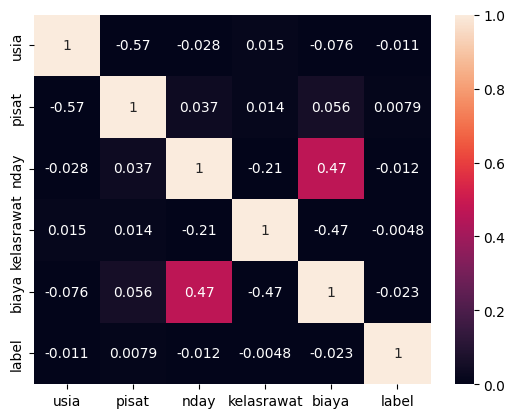

In [5]:
# check correlation between numerical data and the label
import seaborn as sns
sns.heatmap(numeric_col.corr(), annot=True, vmin=0, vmax=1)

In [7]:
# labelencode all categorical data and save to variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical = pd.DataFrame()
categorical["dati2"] = le.fit_transform(samp["dati2"])
categorical["typefaskes"] = le.fit_transform(samp["typefaskes"])
categorical["jenkel"] = le.fit_transform(samp["jenkel"])
categorical["jenispel"] = le.fit_transform(samp["jenispel"])
categorical["jenispulang"] = le.fit_transform(samp["jenispulang"])
categorical["cbg"] = le.fit_transform(samp["cbg"])
categorical

,dati2,typefaskes,jenkel,jenispel,jenispulang,cbg
0,15,16,1,1,0,780
1,15,0,0,0,0,102
2,15,16,1,1,0,782
3,15,16,1,1,0,782
4,15,0,1,1,0,782
...,...,...,...,...,...,...
11291759,296,1,1,0,0,738
11291760,229,0,1,0,0,727
11291761,114,1,0,0,0,717
11291762,97,24,0,0,0,717


In [10]:
# check the p value each column to label using chi square
from sklearn.feature_selection import chi2
res_chi2 = chi2(categorical, samp["label"])
p_val = pd.Series(res_chi2[1], index=categorical.columns)
p_val.sort_values()

dati2          0.000000e+00
typefaskes     0.000000e+00
cbg            0.000000e+00
jenispulang    5.948716e-37
jenkel         9.271066e-17
jenispel       5.667109e-09
dtype: float64

In [12]:
# imbalance data
samp["label"].value_counts()

0    11136086
1      155678
Name: label, dtype: int64

## Proc and Diag

In [7]:
# load all dataset for samp only using the id and label for merging proc and diag
import pandas as pd
import gc

samp = pd.read_csv("temp_data/1/train_samp_cleaned.csv", usecols=["id", "label"])
proc = pd.read_csv("temp_data/1/train_proc_cleaned.csv")
diag = pd.read_csv("temp_data/1/train_diag_cleaned.csv")


C:\Users\ewwwr\AppData\Local\Temp\ipykernel_11412\3760645589.py:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  proc = pd.read_csv("temp_data/1/train_proc_cleaned.csv")


In [8]:
# counting amount of proc on each id
# if the calculation is null its actualy 1 caused by .duplicated method only counting
# the duplicate value so i fill null value with 1

temp = dict(proc[proc["id"].duplicated(keep=False)]["id"].value_counts())
temp = pd.DataFrame({
    "id":list(temp.keys()),
    "nproc":list(temp.values())
})
proc = pd.merge(proc, temp, on="id", how="left")
proc["nproc"].fillna(1, inplace=True)  
del temp
gc.collect()
proc

,id,proc,nproc
0,6,90.59,3.0
1,6,69.01,3.0
2,6,88.78,3.0
3,27,90.59,2.0
4,27,88.78,2.0
...,...,...,...
12120158,11426915,93.57,1.0
12120159,11426927,89.52,4.0
12120160,11426927,96.55,4.0
12120161,11426927,87.39,4.0


In [9]:
# drop the duplicate id because we have got the amount of proc in nproc column
proc.drop_duplicates(subset="id", inplace=True)
proc

,id,proc,nproc
0,6,90.59,3.0
3,27,90.59,2.0
5,29,88.76,1.0
6,30,90.59,1.0
7,33,90.59,2.0
...,...,...,...
12120155,11426788,88.78,1.0
12120156,11426822,23.3,1.0
12120157,11426839,4.81,1.0
12120158,11426915,93.57,1.0


In [10]:
# left join the nproc column with the samp
# fillna with 0 because if there is null it means the patient doesnt have any procedure

proc.drop("proc", axis=1, inplace=True)
df = pd.merge(samp, proc, on="id", how="left")
df["nproc"].fillna(0, inplace=True)
df

,id,label,nproc
0,165666,0,0.0
1,1010828,0,1.0
2,166042,0,0.0
3,168937,0,0.0
4,1005899,0,0.0
...,...,...,...
11291759,9983563,0,4.0
11291760,11053870,0,5.0
11291761,7461049,0,1.0
11291762,1075162,0,1.0


In [11]:
# same as before counting the secondary diagnose
# and fill the null with 1
temp = dict(diag[diag["id"].duplicated(keep=False)]["id"].value_counts())
temp = pd.DataFrame({
    "id":list(temp.keys()),
    "nsdiag":list(temp.values())
})
diag = pd.merge(diag, temp, on="id", how="left")
diag["nsdiag"].fillna(1, inplace=True)
del temp
gc.collect()
diag

,id,diag,levelid,nsdiag
0,111,O86.0,2,1.0
1,133,K30,2,1.0
2,231,E11.9,2,2.0
3,231,K30,2,2.0
4,248,O82.1,2,2.0
...,...,...,...,...
5905250,11426932,M79.1,2,1.0
5905251,11426946,N30.0,2,1.0
5905252,11426947,K30,2,2.0
5905253,11426947,E78.0,2,2.0


In [12]:
# dropping the duplicate id because we have got the nsdiag
diag.drop_duplicates(subset="id", inplace=True)
diag

,id,diag,levelid,nsdiag
0,111,O86.0,2,1.0
1,133,K30,2,1.0
2,231,E11.9,2,2.0
4,248,O82.1,2,2.0
6,259,K30,2,1.0
...,...,...,...,...
5905249,11426929,M54.5,2,1.0
5905250,11426932,M79.1,2,1.0
5905251,11426946,N30.0,2,1.0
5905252,11426947,K30,2,2.0


In [13]:
# left join the nsdiag with other
# fillna with 0 because if there is null it means the patient doesnt have any secondary diagnose
diag.drop(["diag", "levelid"], axis=1, inplace=True)
df = pd.merge(df, diag, on="id", how="left")
df["nsdiag"].fillna(0, inplace=True)
df

,id,label,nproc,nsdiag
0,165666,0,0.0,0.0
1,1010828,0,1.0,1.0
2,166042,0,0.0,2.0
3,168937,0,0.0,2.0
4,1005899,0,0.0,0.0
...,...,...,...,...
11291759,9983563,0,4.0,1.0
11291760,11053870,0,5.0,1.0
11291761,7461049,0,1.0,1.0
11291762,1075162,0,1.0,0.0


In [14]:
# drop the id column
df.drop("id", axis=1, inplace=True)

In [16]:
# view data
df

,label,nproc,nsdiag
0,0,0.0,0.0
1,0,1.0,1.0
2,0,0.0,2.0
3,0,0.0,2.0
4,0,0.0,0.0
...,...,...,...
11291759,0,4.0,1.0
11291760,0,5.0,1.0
11291761,0,1.0,1.0
11291762,0,1.0,0.0


<AxesSubplot: >

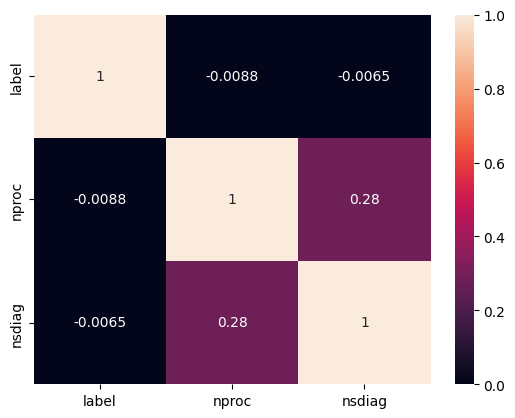

In [15]:
# check the correlation each column against the label
import seaborn as sns
sns.heatmap(df.corr(), annot=True, vmin=0, vmax=1)

# Features Engineering

## Dropping column

In [ ]:
# dropping unused column based on the heatmap and pvalue in eda phase
import pandas as pd
import gc

samp = pd.read_csv("temp_data/1/train_samp_cleaned.csv")
samp.drop(["id_peserta", "pisat", "kelasrawat", "dati2", "typefaskes", "cbg"], axis=1, inplace=True)
samp

In [2]:
# save to some folder
samp.to_csv("temp_data/1/train_samp_cleaned.csv", index=False)

## Handle nday

In [1]:
# make nday column based on tglpulang-tgldatang in days

import pandas as pd
df = pd.read_csv("temp_data/1/train_samp_cleaned.csv")
df["tgldatang"] = pd.to_datetime(df["tgldatang"], format="%Y/%m/%dT%H:%M:%S")
df["tglpulang"] = pd.to_datetime(df["tglpulang"], format="%Y/%m/%dT%H:%M:%S")
df["nday"] = df["tglpulang"] - df["tgldatang"]
df["nday"] = pd.to_timedelta(df["nday"]).dt.days
df

,id,id_peserta,usia,jenkel,tgldatang,tglpulang,jenispel,biaya,jenispulang,label,nday
0,165666,486,48,P,2018-07-25 17:00:00+00:00,2018-07-25 17:00:00+00:00,2,184300.0,1.0,0,0
1,1010828,520,63,L,2019-05-27 17:00:00+00:00,2019-05-30 17:00:00+00:00,1,10628400.0,1.0,0,3
2,166042,523,53,P,2019-07-16 17:00:00+00:00,2019-07-16 17:00:00+00:00,2,187300.0,1.0,0,0
3,168937,549,54,P,2019-10-17 17:00:00+00:00,2019-10-17 17:00:00+00:00,2,187300.0,1.0,0,0
4,1005899,549,53,P,2018-04-18 17:00:00+00:00,2018-04-18 17:00:00+00:00,2,381600.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11291759,9983563,8527704,0,P,2020-12-30 17:00:00+00:00,2021-01-03 17:00:00+00:00,1,3645100.0,1.0,0,4
11291760,11053870,8527709,0,P,2020-12-30 17:00:00+00:00,2021-01-03 17:00:00+00:00,1,12273200.0,1.0,0,4
11291761,7461049,8527751,0,L,2020-12-30 17:00:00+00:00,2021-01-06 17:00:00+00:00,1,4099000.0,1.0,0,7
11291762,1075162,8527853,0,L,2020-12-29 17:00:00+00:00,2020-12-31 17:00:00+00:00,1,3992400.0,1.0,0,2


In [2]:
# droping tglpulang tgldatang
df.drop(["tgldatang", "tglpulang"], axis=1, inplace=True)
df

,id,id_peserta,usia,jenkel,jenispel,biaya,jenispulang,label,nday
0,165666,486,48,P,2,184300.0,1.0,0,0
1,1010828,520,63,L,1,10628400.0,1.0,0,3
2,166042,523,53,P,2,187300.0,1.0,0,0
3,168937,549,54,P,2,187300.0,1.0,0,0
4,1005899,549,53,P,2,381600.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...
11291759,9983563,8527704,0,P,1,3645100.0,1.0,0,4
11291760,11053870,8527709,0,P,1,12273200.0,1.0,0,4
11291761,7461049,8527751,0,L,1,4099000.0,1.0,0,7
11291762,1075162,8527853,0,L,1,3992400.0,1.0,0,2


In [3]:
# save to some folder
df.to_csv("temp_data/1/ready_train_samp.csv", index=False)

## Handle nproc

In [1]:
# the procedure dataset is counted how many procedure each id have and save in nproc column

import pandas as pd
import gc

df = pd.read_csv("temp_data/1/train_proc_cleaned.csv")
df

C:\Users\ewwwr\AppData\Local\Temp\ipykernel_5428\1211103821.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("temp_data/1/train_proc_cleaned.csv")


,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78
...,...,...
12120158,11426915,93.57
12120159,11426927,89.52
12120160,11426927,96.55
12120161,11426927,87.39


In [2]:
# counting the duplicate id for nproc
# same as in the eda phase

temp = dict(df[df["id"].duplicated(keep=False)]["id"].value_counts())
temp = pd.DataFrame({
    "id":list(temp.keys()),
    "nproc":list(temp.values())
})
df = pd.merge(df, temp, on="id", how="left")
df["nproc"].fillna(1, inplace=True)
del temp
gc.collect()
# print(1)

# # one hot encoding
# encoded_proc = pd.get_dummies(df["proc"])
# encoded_proc.drop([2424], axis=1, inplace=True)
# df.drop(["proc"], axis=1, inplace=True)
# print(2)

# # just in case if there is incomplete procedure in dataset eg only 0-50 not 0-99
# # so im creating mechanism that if thereis only 0-50 im creating the 51-99 column
# ls_proc = [x for x in range(100)]
# ls_columns = list(encoded_proc.columns)
# temp = {}
# for i in ls_proc:
#     if i not in ls_columns:
#         temp.__setitem__(i, [None])
# print(3)

# # concat the created column to encoded procedure
# temp = pd.DataFrame(temp)
# encoded_proc = pd.concat([encoded_proc, temp], axis=1)
# encoded_proc.sort_index(axis=1, inplace=True)
# encoded_proc.fillna(0, inplace=True)
# print(4)

# # concat encoded procedure to dataframe
# df = pd.concat([df, encoded_proc], axis=1)
# del encoded_proc, temp
# gc.collect()
# print(5)
df

,id,proc,nproc
0,6,90.59,3.0
1,6,69.01,3.0
2,6,88.78,3.0
3,27,90.59,2.0
4,27,88.78,2.0
...,...,...,...
12120158,11426915,93.57,1.0
12120159,11426927,89.52,4.0
12120160,11426927,96.55,4.0
12120161,11426927,87.39,4.0


In [3]:
# check null
df.isna().sum()

id       0
proc     0
nproc    0
dtype: int64

In [4]:
# drop proc column and drop duplicate
df.drop("proc", axis=1, inplace=True)
df.drop_duplicates(subset="id", inplace=True)
df

,id,nproc
0,6,3.0
3,27,2.0
5,29,1.0
6,30,1.0
7,33,2.0
...,...,...
12120155,11426788,1.0
12120156,11426822,1.0
12120157,11426839,1.0
12120158,11426915,1.0


In [5]:
# save to some folder
df.to_csv("temp_data/1/ready_train_proc.csv", index=False)
df

,id,nproc
0,6,3.0
3,27,2.0
5,29,1.0
6,30,1.0
7,33,2.0
...,...,...
12120155,11426788,1.0
12120156,11426822,1.0
12120157,11426839,1.0
12120158,11426915,1.0


## Handle nsdiag

In [2]:
# reading data

import pandas as pd
import gc

df = pd.read_csv("temp_data/1/train_diag_cleaned.csv")
df

,id,diag,levelid
0,111,O86.0,2
1,133,K30,2
2,231,E11.9,2
3,231,K30,2
4,248,O82.1,2
...,...,...,...
5905250,11426932,M79.1,2
5905251,11426946,N30.0,2
5905252,11426947,K30,2
5905253,11426947,E78.0,2


In [3]:
# counting the duplicate id for secondary diagnose as nsdiag value
# same as in the eda phase
temp = dict(df[df["id"].duplicated(keep=False)]["id"].value_counts())
temp = pd.DataFrame({
    "id":list(temp.keys()),
    "nsdiag":list(temp.values())
})
df = pd.merge(df, temp, on="id", how="left")
df["nsdiag"].fillna(1, inplace=True)
del temp
gc.collect()
# print(1)

# # one hot encoding
# encoded_proc = pd.get_dummies(df["proc"])
# encoded_proc.drop([2424], axis=1, inplace=True)
# df.drop(["proc"], axis=1, inplace=True)
# print(2)

# # just in case if there is incomplete procedure in dataset eg only 0-50 not 0-99
# # so im creating mechanism that if thereis only 0-50 im creating the 51-99 column
# ls_proc = [x for x in range(100)]
# ls_columns = list(encoded_proc.columns)
# temp = {}
# for i in ls_proc:
#     if i not in ls_columns:
#         temp.__setitem__(i, [None])
# print(3)

# # concat the created column to encoded procedure
# temp = pd.DataFrame(temp)
# encoded_proc = pd.concat([encoded_proc, temp], axis=1)
# encoded_proc.sort_index(axis=1, inplace=True)
# encoded_proc.fillna(0, inplace=True)
# print(4)

# # concat encoded procedure to dataframe
# df = pd.concat([df, encoded_proc], axis=1)
# del encoded_proc, temp
# gc.collect()
# print(5)
df

,id,diag,levelid,nsdiag
0,111,O86.0,2,1.0
1,133,K30,2,1.0
2,231,E11.9,2,2.0
3,231,K30,2,2.0
4,248,O82.1,2,2.0
...,...,...,...,...
5905250,11426932,M79.1,2,1.0
5905251,11426946,N30.0,2,1.0
5905252,11426947,K30,2,2.0
5905253,11426947,E78.0,2,2.0


In [4]:
# check null
df.isna().sum()

id         0
diag       0
levelid    0
nsdiag     0
dtype: int64

In [5]:
# drop proc column and drop duplicate
df.drop(["diag", "levelid"], axis=1, inplace=True)
df.drop_duplicates(subset="id", inplace=True)
df

,id,nsdiag
0,111,1.0
1,133,1.0
2,231,2.0
4,248,2.0
6,259,1.0
...,...,...
5905249,11426929,1.0
5905250,11426932,1.0
5905251,11426946,1.0
5905252,11426947,2.0


In [6]:
# save to some folder
df.to_csv("temp_data/1/ready_train_diag.csv", index=False)
df

,id,nsdiag
0,111,1.0
1,133,1.0
2,231,2.0
4,248,2.0
6,259,1.0
...,...,...
5905249,11426929,1.0
5905250,11426932,1.0
5905251,11426946,1.0
5905252,11426947,2.0


## Encoding Categorical Data

In [1]:
# for categorical data im encode it and one hot enocode it but im only creating a function here
# this function called from somewhere soon because for ram reason im not encoding all 11M+ data
# only data that il use in train and test to encode

# after one hot encoding im dropping one column because its for efficiency
# example there is sex data that have value P and L after one hot encoding it will be have P colum and L colum
# if male it will be 1 for P and 0 for L, actualy it can be described only one of those column
# so if i drop no matter what column eg the L column, if its male the P is 0 and female P is 1

from pandas import DataFrame
import numpy as np
import gc

def encode_categorical(df:DataFrame):

    try:
        df["id"] = df["id"].astype(np.int64)
    except:
        print("no id column skip formating for id column to np.int64")
    try:
        df["typefaskes"] = df["typefaskes"].astype(str)
    except:
        print("no typefaskes column skip formating for typefaskes column to str")
    try:
        df["kelasrawat"] = df["kelasrawat"].astype(np.int8)
    except:
        print("no kelasrawat column skip formating for kelasrawat column to str")

    df["usia"] = df["usia"].astype(np.int8)
    df["jenkel"] = df["jenkel"].astype(str)
    df["jenispel"] = df["jenispel"].astype(str)
    df["jenispulang"] = df["jenispulang"].astype(str)
    df["biaya"] = df["biaya"].astype(float)

    try:
        df["label"] = df["label"].astype(np.int8)
    except:
        print("no label column skip formating for label column to np.int8")

    try:
        encoded_typefaskes = pd.get_dummies(df["typefaskes"])
        try:
            encoded_typefaskes.drop(["KK"], axis=1, inplace=True)
        except:
            print("no KK column skip creating KK column")
        df.drop(["typefaskes"], axis=1, inplace=True)
        df = pd.concat([df, encoded_typefaskes], axis=1)
        del encoded_typefaskes
        gc.collect()
    except:
        print("no typefaskes column skip encoding typefaskes")

    encoded_jenkel = pd.get_dummies(df["jenkel"])
    encoded_jenkel.drop(["P"], axis=1, inplace=True)
    encoded_jenkel = encoded_jenkel.rename(columns={"L":"ismale"})
    df.drop(["jenkel"], axis=1, inplace=True)
    df = pd.concat([df, encoded_jenkel], axis=1)
    del encoded_jenkel
    gc.collect()

    encoded_jenispel = pd.get_dummies(df["jenispel"])
    encoded_jenispel.drop(["2"], axis=1, inplace=True)
    encoded_jenispel = encoded_jenispel.rename(columns={"1":"jenpel1"})
    df.drop(["jenispel"], axis=1, inplace=True)
    df = pd.concat([df, encoded_jenispel], axis=1)
    del encoded_jenispel
    gc.collect()

    encoded_jenispulang = pd.get_dummies(df["jenispulang"])
    encoded_jenispulang.drop(["5.0"], axis=1, inplace=True)
    encoded_jenispulang = encoded_jenispulang.rename(columns={
                                                    "1.0":"jenpul1",
                                                    "2.0":"jenpul2",
                                                    "3.0":"jenpul3",
                                                    "4.0":"jenpul4",
                                                })
    df.drop(["jenispulang"], axis=1, inplace=True)
    df = pd.concat([df, encoded_jenispulang], axis=1)
    del encoded_jenispulang
    gc.collect()

    # encoded_proc = pd.get_dummies(df["proc"])
    # encoded_proc.drop(["2424"], axis=1, inplace=True)
    # df.drop(["proc"], axis=1, inplace=True)
    # df = pd.concat([df, encoded_proc], axis=1)
    # del encoded_proc
    # gc.collect()
    
    return df

## Balancing Data

### Mixed

In [2]:
# in here im implementing 
# undersampling the majority class (label 0) because if i oversampling the 1 class (150k) to 0 class (11M+)
# i think its too much, so in the label 0 class il take it 2.000.000 samples
# oversampling minority class (label 1) using SMOTE
# so i call it mixed

In [3]:
# reading the data and join using left join
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("temp_data/1/ready_train_samp.csv")
proc = pd.read_csv("temp_data/1/ready_train_proc.csv")
diag = pd.read_csv("temp_data/1/ready_train_diag.csv")

df = pd.merge(df, proc, on="id", how="left")
df

,id,id_peserta,usia,jenkel,jenispel,biaya,jenispulang,label,nday,nproc
0,165666,486,48,P,2,184300.0,1.0,0,0,NaN
1,1010828,520,63,L,1,10628400.0,1.0,0,3,1.0
2,166042,523,53,P,2,187300.0,1.0,0,0,NaN
3,168937,549,54,P,2,187300.0,1.0,0,0,NaN
4,1005899,549,53,P,2,381600.0,1.0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...
11291759,9983563,8527704,0,P,1,3645100.0,1.0,0,4,4.0
11291760,11053870,8527709,0,P,1,12273200.0,1.0,0,4,5.0
11291761,7461049,8527751,0,L,1,4099000.0,1.0,0,7,1.0
11291762,1075162,8527853,0,L,1,3992400.0,1.0,0,2,1.0


In [4]:
# left join the nsdiag column
df = pd.merge(df, diag, on="id", how="left")
df

,id,id_peserta,usia,jenkel,jenispel,biaya,jenispulang,label,nday,nproc,nsdiag
0,165666,486,48,P,2,184300.0,1.0,0,0,NaN,NaN
1,1010828,520,63,L,1,10628400.0,1.0,0,3,1.0,1.0
2,166042,523,53,P,2,187300.0,1.0,0,0,NaN,2.0
3,168937,549,54,P,2,187300.0,1.0,0,0,NaN,2.0
4,1005899,549,53,P,2,381600.0,1.0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11291759,9983563,8527704,0,P,1,3645100.0,1.0,0,4,4.0,1.0
11291760,11053870,8527709,0,P,1,12273200.0,1.0,0,4,5.0,1.0
11291761,7461049,8527751,0,L,1,4099000.0,1.0,0,7,1.0,1.0
11291762,1075162,8527853,0,L,1,3992400.0,1.0,0,2,1.0,NaN


In [5]:
# fill nproc null value with 0 because if null there is no procedure and nsdiag counted in proc diag table
df["nproc"].fillna(0, inplace=True)
df["nsdiag"].fillna(0, inplace=True)
df.isna().sum()


id             0
id_peserta     0
usia           0
jenkel         0
jenispel       0
biaya          0
jenispulang    0
label          0
nday           0
nproc          0
nsdiag         0
dtype: int64

In [6]:
# check the imbalance
df["label"].value_counts()

0    11136086
1      155678
Name: label, dtype: int64

In [7]:
# view the data
df

,id,id_peserta,usia,jenkel,jenispel,biaya,jenispulang,label,nday,nproc,nsdiag
0,165666,486,48,P,2,184300.0,1.0,0,0,0.0,0.0
1,1010828,520,63,L,1,10628400.0,1.0,0,3,1.0,1.0
2,166042,523,53,P,2,187300.0,1.0,0,0,0.0,2.0
3,168937,549,54,P,2,187300.0,1.0,0,0,0.0,2.0
4,1005899,549,53,P,2,381600.0,1.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11291759,9983563,8527704,0,P,1,3645100.0,1.0,0,4,4.0,1.0
11291760,11053870,8527709,0,P,1,12273200.0,1.0,0,4,5.0,1.0
11291761,7461049,8527751,0,L,1,4099000.0,1.0,0,7,1.0,1.0
11291762,1075162,8527853,0,L,1,3992400.0,1.0,0,2,1.0,0.0


In [8]:
# drop id_peserta
df.drop("id_peserta", axis=1, inplace=True)
df

,id,usia,jenkel,jenispel,biaya,jenispulang,label,nday,nproc,nsdiag
0,165666,48,P,2,184300.0,1.0,0,0,0.0,0.0
1,1010828,63,L,1,10628400.0,1.0,0,3,1.0,1.0
2,166042,53,P,2,187300.0,1.0,0,0,0.0,2.0
3,168937,54,P,2,187300.0,1.0,0,0,0.0,2.0
4,1005899,53,P,2,381600.0,1.0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11291759,9983563,0,P,1,3645100.0,1.0,0,4,4.0,1.0
11291760,11053870,0,P,1,12273200.0,1.0,0,4,5.0,1.0
11291761,7461049,0,L,1,4099000.0,1.0,0,7,1.0,1.0
11291762,1075162,0,L,1,3992400.0,1.0,0,2,1.0,0.0


In [9]:
# x for all column except label
# y for label column only

x = df.drop(["label"], axis=1)
y = df["label"]

In [10]:
# before balancing the data i split the train data into train and test
# because i dont want the balanced/artificial data is used during testing

# split the data into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=24)
print(ytrain.value_counts())
print(ytest.value_counts())

0    8909038
1     124373
Name: label, dtype: int64
0    2227048
1      31305
Name: label, dtype: int64


In [11]:
# before performing sampling the train data im merging x and y for train
# because if not when i performing sampling the index of the record data for x and y will not match

xtrain.insert(len(xtrain.columns), "label", ytrain)
xtrain

,id,usia,jenkel,jenispel,biaya,jenispulang,nday,nproc,nsdiag,label
6614422,9360097,44,L,1,7085700.0,1.0,7,5.0,5.0,0
4712123,9471956,51,P,2,215000.0,1.0,0,2.0,0.0,0
7679502,2980934,65,L,2,185000.0,1.0,0,0.0,0.0,0
8982509,5023565,66,P,2,115800.0,1.0,0,3.0,1.0,0
3416670,116369,41,L,2,130400.0,1.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
5657729,6983324,3,L,2,184600.0,1.0,0,0.0,0.0,0
4647057,936902,67,P,2,190400.0,1.0,0,0.0,1.0,0
8905047,593607,17,P,2,0.0,1.0,0,1.0,0.0,1
1259712,7842603,49,P,2,190400.0,1.0,0,1.0,1.0,0


In [12]:
# set the all 0 label to train_0 for soon performing undersampling for this 0 class
train_0 = xtrain[xtrain["label"] == 0]
train_0

,id,usia,jenkel,jenispel,biaya,jenispulang,nday,nproc,nsdiag,label
6614422,9360097,44,L,1,7085700.0,1.0,7,5.0,5.0,0
4712123,9471956,51,P,2,215000.0,1.0,0,2.0,0.0,0
7679502,2980934,65,L,2,185000.0,1.0,0,0.0,0.0,0
8982509,5023565,66,P,2,115800.0,1.0,0,3.0,1.0,0
3416670,116369,41,L,2,130400.0,1.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
7221371,8860902,0,L,2,483400.0,1.0,0,2.0,0.0,0
5657729,6983324,3,L,2,184600.0,1.0,0,0.0,0.0,0
4647057,936902,67,P,2,190400.0,1.0,0,0.0,1.0,0
1259712,7842603,49,P,2,190400.0,1.0,0,1.0,1.0,0


In [13]:
# keep the 1 class to train_1 class soon it will merge with undersampled 0 class
train_1 = xtrain[xtrain["label"] == 1]
train_1

,id,usia,jenkel,jenispel,biaya,jenispulang,nday,nproc,nsdiag,label
8560792,8832961,63,L,2,0.0,1.0,0,0.0,0.0,1
5358456,2285153,35,P,1,6965200.0,1.0,3,1.0,3.0,1
3400468,6131708,8,P,2,380500.0,1.0,0,1.0,0.0,1
10912280,2017795,66,P,2,0.0,1.0,0,1.0,0.0,1
3432450,5776482,1,P,2,175000.0,1.0,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
9950303,10259923,63,L,2,0.0,1.0,0,1.0,0.0,1
2996087,8519005,43,L,2,0.0,1.0,0,2.0,1.0,1
9650805,5240470,55,P,2,213100.0,1.0,0,1.0,2.0,1
11244970,9741448,62,L,2,0.0,1.0,0,4.0,0.0,1


In [14]:
# undersampling the train0 data into 2.000.000
# after undersampled im appending the 1 class data below of the 0 class data
train = train_0.sample(n=2_000_000, random_state=24)
train = pd.concat([train, train_1], ignore_index=True)
train

,id,usia,jenkel,jenispel,biaya,jenispulang,nday,nproc,nsdiag,label
0,7570239,9,L,2,967000.0,1.0,0,1.0,0.0,0
1,4979730,31,P,2,190000.0,1.0,0,0.0,0.0,0
2,8362635,25,P,1,9989100.0,4.0,4,4.0,2.0,0
3,1028829,50,L,1,4485000.0,1.0,6,2.0,1.0,0
4,10427508,1,P,1,2025500.0,1.0,1,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2124368,10259923,63,L,2,0.0,1.0,0,1.0,0.0,1
2124369,8519005,43,L,2,0.0,1.0,0,2.0,1.0,1
2124370,5240470,55,P,2,213100.0,1.0,0,1.0,2.0,1
2124371,9741448,62,L,2,0.0,1.0,0,4.0,0.0,1


In [15]:
# here im calling the encode method i have created before
# basicaly one hot encoding and dropping one of the column
train = encode_categorical(train)
train

no typefaskes column skip formating for typefaskes column to str
no kelasrawat column skip formating for kelasrawat column to str
no typefaskes column skip encoding typefaskes


,id,usia,biaya,nday,nproc,nsdiag,label,ismale,jenpel1,jenpul1,jenpul2,jenpul3,jenpul4
0,7570239,9,967000.0,0,1.0,0.0,0,1,0,1,0,0,0
1,4979730,31,190000.0,0,0.0,0.0,0,0,0,1,0,0,0
2,8362635,25,9989100.0,4,4.0,2.0,0,0,1,0,0,0,1
3,1028829,50,4485000.0,6,2.0,1.0,0,1,1,1,0,0,0
4,10427508,1,2025500.0,1,0.0,0.0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124368,10259923,63,0.0,0,1.0,0.0,1,1,0,1,0,0,0
2124369,8519005,43,0.0,0,2.0,1.0,1,1,0,1,0,0,0
2124370,5240470,55,213100.0,0,1.0,2.0,1,0,0,1,0,0,0
2124371,9741448,62,0.0,0,4.0,0.0,1,1,0,1,0,0,0


In [16]:
# drop id column
xtrain.drop("id", axis=1, inplace=True)

In [17]:
# setting again the xtrain and ytrain from undersampled data
xtrain = train.drop(["label"], axis=1)
ytrain = train["label"]
ytrain.value_counts()

0    2000000
1     124373
Name: label, dtype: int64

In [18]:
# delete var for ram reason
del train, train_0, train_1
gc.collect()

0

In [19]:
# oversampling the 1 class data using smote from imblearn
# and place it in x, y so x and y is the artificial train data
from imblearn.over_sampling import SMOTE
sampler = SMOTE(sampling_strategy="minority")

x, y = sampler.fit_resample(xtrain, ytrain)
y.value_counts()

0    2000000
1    2000000
Name: label, dtype: int64

In [20]:
# check x
x

,id,usia,biaya,nday,nproc,nsdiag,ismale,jenpel1,jenpul1,jenpul2,jenpul3,jenpul4
0,7570239,9,9.670000e+05,0,1.000000,0.000000,1,0,1,0,0,0
1,4979730,31,1.900000e+05,0,0.000000,0.000000,0,0,1,0,0,0
2,8362635,25,9.989100e+06,4,4.000000,2.000000,0,1,0,0,0,1
3,1028829,50,4.485000e+06,6,2.000000,1.000000,1,1,1,0,0,0
4,10427508,1,2.025500e+06,1,0.000000,0.000000,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,2305873,50,5.471000e+05,0,0.619181,1.000000,0,0,1,0,0,0
3999996,4267060,0,7.193563e+06,1,0.280025,1.000000,0,1,0,0,0,0
3999997,2125682,25,3.821318e+06,1,0.721856,0.556287,0,1,1,0,0,0
3999998,9915976,24,6.801200e+06,3,2.000000,1.000000,0,1,1,0,0,0


In [21]:
# formating variable
x["nproc"] = x["nproc"].astype(int)
x["biaya"] = x["biaya"].astype(int)
x["nsdiag"] = x["biaya"].astype(int)
x.drop("id", axis=1, inplace=True)
x

,usia,biaya,nday,nproc,nsdiag,ismale,jenpel1,jenpul1,jenpul2,jenpul3,jenpul4
0,9,967000,0,1,967000,1,0,1,0,0,0
1,31,190000,0,0,190000,0,0,1,0,0,0
2,25,9989100,4,4,9989100,0,1,0,0,0,1
3,50,4485000,6,2,4485000,1,1,1,0,0,0
4,1,2025500,1,0,2025500,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3999995,50,547100,0,0,547100,0,0,1,0,0,0
3999996,0,7193562,1,0,7193562,0,1,0,0,0,0
3999997,25,3821317,1,0,3821317,0,1,1,0,0,0
3999998,24,6801200,3,2,6801200,0,1,1,0,0,0


In [22]:
# using minmax scaler to scale all column
# save the fitted scaler to some folder, it usefull for reused in future implementation

from sklearn.preprocessing import MinMaxScaler
import joblib

bpjs_mmscaler = MinMaxScaler()
columns = x.drop(["biaya"], axis=1).columns

bpjs_sscaler = bpjs_mmscaler.fit(x[columns])
joblib.dump(bpjs_mmscaler, "bpjs_mmcaler.save")

x[columns] = bpjs_mmscaler.transform(x[columns])
x

,usia,biaya,nday,nproc,nsdiag,ismale,jenpel1,jenpul1,jenpul2,jenpul3,jenpul4
0,0.082569,967000,0.000000,0.045455,0.054554,1.0,0.0,1.0,0.0,0.0,0.0
1,0.284404,190000,0.000000,0.000000,0.010719,0.0,0.0,1.0,0.0,0.0,0.0
2,0.229358,9989100,0.005848,0.181818,0.563547,0.0,1.0,0.0,0.0,0.0,1.0
3,0.458716,4485000,0.008772,0.090909,0.253027,1.0,1.0,1.0,0.0,0.0,0.0
4,0.009174,2025500,0.001462,0.000000,0.114271,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3999995,0.458716,547100,0.000000,0.000000,0.030865,0.0,0.0,1.0,0.0,0.0,0.0
3999996,0.000000,7193562,0.001462,0.000000,0.405834,0.0,1.0,0.0,0.0,0.0,0.0
3999997,0.229358,3821317,0.001462,0.000000,0.215584,0.0,1.0,1.0,0.0,0.0,0.0
3999998,0.220183,6801200,0.004386,0.090909,0.383698,0.0,1.0,1.0,0.0,0.0,0.0


## Validation & Test Data

In [23]:
# im splitting test data into validation and test
# set new variable 
d_test = pd.concat([xtest, ytest], axis=1)
d_test

,id,usia,jenkel,jenispel,biaya,jenispulang,nday,nproc,nsdiag,label
7453771,677670,42,P,2,148400.0,1.0,0,1.0,0.0,0
7051322,6883102,0,P,2,192400.0,1.0,0,0.0,1.0,0
7255929,8531594,12,L,2,184600.0,1.0,0,0.0,1.0,0
3205207,4729487,63,L,2,192100.0,1.0,0,1.0,0.0,0
7226889,5778008,39,P,2,243500.0,1.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6530525,4949443,44,P,2,195600.0,1.0,0,0.0,2.0,0
1299232,4850222,32,L,2,187000.0,1.0,0,0.0,0.0,0
7674248,4603081,0,L,1,3142800.0,1.0,1,1.0,0.0,0
8428805,10559502,0,L,1,3887600.0,1.0,3,7.0,0.0,0


In [24]:
# drop id column
d_test.drop("id", axis=1, inplace=True)
d_test.head()

,usia,jenkel,jenispel,biaya,jenispulang,nday,nproc,nsdiag,label
7453771,42,P,2,148400.0,1.0,0,1.0,0.0,0
7051322,0,P,2,192400.0,1.0,0,0.0,1.0,0
7255929,12,L,2,184600.0,1.0,0,0.0,1.0,0
3205207,63,L,2,192100.0,1.0,0,1.0,0.0,0
7226889,39,P,2,243500.0,1.0,0,0.0,0.0,0


In [25]:
# check label
d_test["label"].value_counts()

0    2227048
1      31305
Name: label, dtype: int64

In [26]:
# one hot encoding
d_test = encode_categorical(d_test)
d_test

no id column skip formating for id column to np.int64
no typefaskes column skip formating for typefaskes column to str
no kelasrawat column skip formating for kelasrawat column to str
no typefaskes column skip encoding typefaskes


,usia,biaya,nday,nproc,nsdiag,label,ismale,jenpel1,jenpul1,jenpul2,jenpul3,jenpul4
7453771,42,148400.0,0,1.0,0.0,0,0,0,1,0,0,0
7051322,0,192400.0,0,0.0,1.0,0,0,0,1,0,0,0
7255929,12,184600.0,0,0.0,1.0,0,1,0,1,0,0,0
3205207,63,192100.0,0,1.0,0.0,0,1,0,1,0,0,0
7226889,39,243500.0,0,0.0,0.0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6530525,44,195600.0,0,0.0,2.0,0,0,0,1,0,0,0
1299232,32,187000.0,0,0.0,0.0,0,1,0,1,0,0,0
7674248,0,3142800.0,1,1.0,0.0,0,1,1,1,0,0,0
8428805,0,3887600.0,3,7.0,0.0,0,1,1,1,0,0,0


In [27]:
# scaling
# columns = d_test.drop("label", axis=1).columns
d_test[columns] = bpjs_mmscaler.transform(d_test[columns])
d_test

,usia,biaya,nday,nproc,nsdiag,label,ismale,jenpel1,jenpul1,jenpul2,jenpul3,jenpul4
7453771,0.385321,148400.0,0.000000,0.045455,0.000000e+00,0,0.0,0.0,1.0,0.0,0.0,0.0
7051322,0.000000,192400.0,0.000000,0.000000,5.641622e-08,0,0.0,0.0,1.0,0.0,0.0,0.0
7255929,0.110092,184600.0,0.000000,0.000000,5.641622e-08,0,1.0,0.0,1.0,0.0,0.0,0.0
3205207,0.577982,192100.0,0.000000,0.045455,0.000000e+00,0,1.0,0.0,1.0,0.0,0.0,0.0
7226889,0.357798,243500.0,0.000000,0.000000,0.000000e+00,0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6530525,0.403670,195600.0,0.000000,0.000000,1.128324e-07,0,0.0,0.0,1.0,0.0,0.0,0.0
1299232,0.293578,187000.0,0.000000,0.000000,0.000000e+00,0,1.0,0.0,1.0,0.0,0.0,0.0
7674248,0.000000,3142800.0,0.001462,0.045455,0.000000e+00,0,1.0,1.0,1.0,0.0,0.0,0.0
8428805,0.000000,3887600.0,0.004386,0.318182,0.000000e+00,0,1.0,1.0,1.0,0.0,0.0,0.0


In [28]:
# split test data, 0.3 to validation, 0.7 to test
xval, xtest, yval, ytest = train_test_split(d_test.drop("label", axis=1), d_test["label"], test_size=0.7, random_state=24)

In [29]:
# check validation label
yval.value_counts()

0    668009
1      9496
Name: label, dtype: int64

In [30]:
# check test label
ytest.value_counts()

0    1559039
1      21809
Name: label, dtype: int64

# Modeling

In [ ]:
# im using the NN

## NN1

In [31]:
# create the neural network
# im using 1 input, 1 hidden, and 1 output layer (1 node for 0-1 value)
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint

nn = keras.Sequential()
nn.add(layers.InputLayer(input_shape=(x.shape[1],)))
nn.add(layers.Dense(18, activation="relu"))
nn.add(layers.Dense(1, activation="sigmoid"))

ckpt = ModelCheckpoint("model/nn_v2", save_best_only=True)
nn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                216       
                                                                 
 dense_1 (Dense)             (None, 1)                 19        
                                                                 
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [32]:
# training the model using the artificial train data
nn.fit(x, y, validation_data=(xval, yval), epochs=5, callbacks=ckpt)

Epoch 1/5
125000/125000 [==============================] - 244s 2ms/step - loss: 581.4764 - accuracy: 0.6215 - val_loss: 31.1459 - val_accuracy: 0.9912
Epoch 2/5
125000/125000 [==============================] - 239s 2ms/step - loss: 325.4855 - accuracy: 0.6300 - val_loss: 693.0790 - val_accuracy: 0.0201
Epoch 3/5
125000/125000 [==============================] - 234s 2ms/step - loss: 239.9909 - accuracy: 0.6324 - val_loss: 391.9095 - val_accuracy: 0.0549
Epoch 4/5
125000/125000 [==============================] - 238s 2ms/step - loss: 157.2908 - accuracy: 0.6344 - val_loss: 1.8612 - val_accuracy: 0.9912
Epoch 5/5
125000/125000 [==============================] - 240s 2ms/step - loss: 68.1614 - accuracy: 0.6328 - val_loss: 0.5033 - val_accuracy: 0.9912


In [33]:
# make sure the encoding and scalling is correct
xtest

,usia,biaya,nday,nproc,nsdiag,ismale,jenpel1,jenpul1,jenpul2,jenpul3,jenpul4
3986552,0.073394,182600.0,0.000000,0.000000,0.000000e+00,1.0,0.0,1.0,0.0,0.0,0.0
773816,0.522936,7582500.0,0.011696,0.363636,2.256649e-07,1.0,1.0,1.0,0.0,0.0,0.0
1022982,0.532110,409200.0,0.000000,0.090909,1.128324e-07,0.0,0.0,1.0,0.0,0.0,0.0
2338226,0.605505,204200.0,0.000000,0.000000,5.641622e-08,1.0,0.0,1.0,0.0,0.0,0.0
11207355,0.348624,357600.0,0.000000,0.000000,0.000000e+00,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8159,0.477064,1650100.0,0.007310,0.000000,5.641622e-08,0.0,1.0,1.0,0.0,0.0,0.0
6457892,0.211009,183000.0,0.000000,0.000000,0.000000e+00,1.0,0.0,1.0,0.0,0.0,0.0
9763342,0.000000,5987500.0,0.000000,0.090909,1.692486e-07,1.0,1.0,1.0,0.0,0.0,0.0
11265816,0.119266,186700.0,0.000000,0.000000,0.000000e+00,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
# predict the xtest
ypred = nn.predict(xtest)

49402/49402 [==============================] - 57s 1ms/step


In [35]:
# because the output is continous from 0-1 im round it so it will only have 0 or 1 match for label
ypred = np.round(ypred)

In [36]:
#print the classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1559039
           1       0.95      0.38      0.55     21809

    accuracy                           0.99   1580848
   macro avg       0.97      0.69      0.77   1580848
weighted avg       0.99      0.99      0.99   1580848



In [37]:
# get information of the confussion matrix for calculating specificity
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()

In [38]:
# calculating specificity
tn/(tn+fp)

0.9997318861170247

In [39]:
# save the model to some folder
nn.save("model/nn_v2.h5")

## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier()
dt.fit(x, y)
ypred = dt.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      0.01      0.01   1559039
           1       0.01      1.00      0.03     21809

    accuracy                           0.02   1580848
   macro avg       0.50      0.50      0.02   1580848
weighted avg       0.98      0.02      0.01   1580848



In [41]:
tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()

tn/(tn+fp)

0.0050871081480322175

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x, y)
ypred = rf.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06   1559039
           1       0.01      0.99      0.03     21809

    accuracy                           0.04   1580848
   macro avg       0.50      0.51      0.04   1580848
weighted avg       0.98      0.04      0.06   1580848



In [43]:
tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()

tn/(tn+fp)

0.031152524086953567

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

lr.fit(x, y)
ypred = lr.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1559039
           1       0.96      0.20      0.33     21809

    accuracy                           0.99   1580848
   macro avg       0.98      0.60      0.66   1580848
weighted avg       0.99      0.99      0.99   1580848



In [45]:
tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()

tn/(tn+fp)

0.9998890342063284

## SVM

In [46]:
from sklearn.svm import LinearSVC
svm = LinearSVC()

svm.fit(x, y)
ypred = svm.predict(xtest)
print(classification_report(ytest, ypred))

c:\Users\ewwwr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ewwwr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ewwwr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00   1559039
           1       0.01      1.00      0.03     21809

    accuracy                           0.01   1580848
   macro avg       0.01      0.50      0.01   1580848
weighted avg       0.00      0.01      0.00   1580848



c:\Users\ewwwr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()

tn/(tn+fp)

0.0

## XGBoost

In [48]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(x, y)
ypred = xgbc.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94   1559039
           1       0.07      0.64      0.13     21809

    accuracy                           0.88   1580848
   macro avg       0.53      0.76      0.53   1580848
weighted avg       0.98      0.88      0.93   1580848



In [49]:
tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()

tn/(tn+fp)

0.8865057256425273

## Naive Bayes

In [50]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x, y)
ypred = mnb.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.99      0.37      0.54   1559039
           1       0.02      0.74      0.03     21809

    accuracy                           0.37   1580848
   macro avg       0.50      0.55      0.28   1580848
weighted avg       0.98      0.37      0.53   1580848



In [51]:
tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()

tn/(tn+fp)

0.3666406036026039

## K-Nearest Neighbours

In [55]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier()
# knn.fit(x, y)
# ypred = knn.predict(xtest)
# print(classification_report(ytest, ypred))

In [ ]:
# tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()

# tn/(tn+fp)

## VotingClassifier

In [ ]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.model_selection import GridSearchCV

# vc = VotingClassifier([
#     ("nn", nn),
#     ("dt", dt),
#     ("svm", svm)
# ])
# params = {
#     "voting":["hard", "soft"],
#     "weights":[(1,1,1),(2,1,1),(1,2,1),(1,1,2),(2,2,1),(1,2,2)]
# }
# grid = GridSearchCV(vc, params)

# grid.fit(x,y)

In [ ]:
# print(grid.best_params_)
# print(grid.best_score_)

# --Submission--

# Data Preparation

In [56]:
# reading sampling
import pandas as pd
import gc

samp = pd.read_csv("dataset/test/sampling3_healthkathon2022_sep.csv", sep=";")
samp

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd
0,3548,1,8,KL,67,L,1.0,2020-01-20T17:00:00.000Z,2020-01-20T17:00:00.000Z,2,...,K21.9,187300.0,1,Q-5-44-0,3,None,None,None,None,None
1,85390,2,17,A,60,L,1.0,2019-02-06T17:00:00.000Z,2019-02-06T17:00:00.000Z,2,...,I63,381600.0,1,Q-5-44-0,3,None,None,None,None,None
2,89574,3,17,B,66,P,1.0,2019-12-11T17:00:00.000Z,2019-12-11T17:00:00.000Z,2,...,E10.9,185500.0,1,Q-5-44-0,3,None,None,None,None,None
3,88653,4,17,B,52,P,1.0,2020-02-24T17:00:00.000Z,2020-02-24T17:00:00.000Z,2,...,M54.5,185500.0,1,Q-5-44-0,3,None,None,None,None,None
4,88634,5,17,B,63,L,2.0,2020-02-05T17:00:00.000Z,2020-02-05T17:00:00.000Z,2,...,I11.9,185500.0,1,Q-5-44-0,3,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099333,455269,1012063,233,SC,0,P,4.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,...,P03.4,3457000.0,1,P-8-17-I,3,None,None,None,None,None
1099334,1006349,1012064,241,C,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-01T17:00:00.000Z,1,...,P03.4,3416200.0,1,P-8-17-I,3,None,None,None,None,None
1099335,1093249,1012065,318,B,0,P,4.0,2020-12-29T17:00:00.000Z,2021-01-01T17:00:00.000Z,1,...,P03.4,3762200.0,1,P-8-17-I,3,None,None,None,None,None
1099336,1003715,1012066,303,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-22T17:00:00.000Z,1,...,Z03.8,9672000.0,1,P-8-08-III,3,None,None,None,None,None


In [58]:
# reading proc
proc = pd.read_csv("dataset/test/sampling3_healthkathon2022_procedure.csv", sep=";")
proc

,id,kdproc
0,2,74.0
1,2,88.78
2,2,90.59
3,7,90.59
4,10,90.59
...,...,...
869697,1099314,73.59
869698,1099318,90.46
869699,1099318,87.44
869700,1099322,88.78


In [55]:
# reading diag
diag = pd.read_csv("dataset/test/sampling3_healthkathon2022_diagnosa.csv", sep=";")
diag

,id,kddiag,levelid
0,437398,F90.0,2
1,437401,H25.9,1
2,438542,A16.0,2
3,439298,Z09.8,1
4,439749,O48,1
...,...,...,...
2209467,794601,H66.9,2
2209468,795524,O99.0,1
2209469,797586,H04.0,2
2209470,798050,N40,2


# Data Cleansing

## For Testing

### Samp

In [1]:
# reading samp
import pandas as pd
import gc
samp = pd.read_csv("dataset/test/sampling3_healthkathon2022_sep.csv", sep=";")
samp

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd
0,3548,1,8,KL,67,L,1.0,2020-01-20T17:00:00.000Z,2020-01-20T17:00:00.000Z,2,...,K21.9,187300.0,1,Q-5-44-0,3,None,None,None,None,None
1,85390,2,17,A,60,L,1.0,2019-02-06T17:00:00.000Z,2019-02-06T17:00:00.000Z,2,...,I63,381600.0,1,Q-5-44-0,3,None,None,None,None,None
2,89574,3,17,B,66,P,1.0,2019-12-11T17:00:00.000Z,2019-12-11T17:00:00.000Z,2,...,E10.9,185500.0,1,Q-5-44-0,3,None,None,None,None,None
3,88653,4,17,B,52,P,1.0,2020-02-24T17:00:00.000Z,2020-02-24T17:00:00.000Z,2,...,M54.5,185500.0,1,Q-5-44-0,3,None,None,None,None,None
4,88634,5,17,B,63,L,2.0,2020-02-05T17:00:00.000Z,2020-02-05T17:00:00.000Z,2,...,I11.9,185500.0,1,Q-5-44-0,3,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099333,455269,1012063,233,SC,0,P,4.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,...,P03.4,3457000.0,1,P-8-17-I,3,None,None,None,None,None
1099334,1006349,1012064,241,C,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-01T17:00:00.000Z,1,...,P03.4,3416200.0,1,P-8-17-I,3,None,None,None,None,None
1099335,1093249,1012065,318,B,0,P,4.0,2020-12-29T17:00:00.000Z,2021-01-01T17:00:00.000Z,1,...,P03.4,3762200.0,1,P-8-17-I,3,None,None,None,None,None
1099336,1003715,1012066,303,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-22T17:00:00.000Z,1,...,Z03.8,9672000.0,1,P-8-08-III,3,None,None,None,None,None


In [2]:
# dropping duplicate id because it must be unique
# samp.drop_duplicates(subset="id", inplace=True)
# samp

In [3]:
# check if there is any null value
samp.isna().sum()

id                  0
id_peserta          0
dati2               0
typefaskes          0
usia                0
jenkel              2
pisat               7
tgldatang           0
tglpulang           0
jenispel            0
politujuan     117900
diagfktp           77
biaya            5530
jenispulang         0
cbg                 0
kelasrawat          0
kdsa            23348
kdsp            23276
kdsr            23344
kdsi            23325
kdsd            23329
dtype: int64

In [4]:
# check the amount of unique value each row
for i in samp.columns:
    if i not in ["id", "id_peserta", "diagfktp", "label", "kdsa", "kdsp", "kdsr", "kdsi", "kdsd", "politujuan"]:
        print(f"{i}: {len(samp[i].unique())} unique")

dati2: 486 unique
typefaskes: 26 unique
usia: 106 unique
jenkel: 3 unique
pisat: 6 unique
tgldatang: 1096 unique
tglpulang: 1118 unique
jenispel: 2 unique
biaya: 18282 unique
jenispulang: 5 unique
cbg: 883 unique
kelasrawat: 3 unique


In [5]:
# droping too many unique value and in the kdsa, kdsp, ... there is many null value 
# but it filled with string "None"
samp.drop(["politujuan", "diagfktp", "kdsa", "kdsp", "kdsr", "kdsi", "kdsd"], axis=1, inplace=True)
samp["biaya"].fillna(0, inplace=True)
samp.isna().sum()

id             0
id_peserta     0
dati2          0
typefaskes     0
usia           0
jenkel         2
pisat          7
tgldatang      0
tglpulang      0
jenispel       0
biaya          0
jenispulang    0
cbg            0
kelasrawat     0
dtype: int64

In [6]:
samp["jenkel"].fillna(samp["jenkel"].mode()[0], inplace=True)
samp["pisat"].fillna(samp["pisat"].mode()[0], inplace=True)
samp.isna().sum()

id             0
id_peserta     0
dati2          0
typefaskes     0
usia           0
jenkel         0
pisat          0
tgldatang      0
tglpulang      0
jenispel       0
biaya          0
jenispulang    0
cbg            0
kelasrawat     0
dtype: int64

In [7]:
# tidy up all string column to uppercase and remove whitespace
samp["typefaskes"] = samp["typefaskes"].str.upper()
samp["typefaskes"] = samp["typefaskes"].str.replace(" ", "")
samp["jenkel"] = samp["jenkel"].str.upper()
samp["jenkel"] = samp["jenkel"].str.replace(" ", "")
samp["cbg"] = samp["cbg"].str.upper()
samp["cbg"] = samp["cbg"].str.replace(" ", "")
samp

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,biaya,jenispulang,cbg,kelasrawat
0,3548,1,8,KL,67,L,1.0,2020-01-20T17:00:00.000Z,2020-01-20T17:00:00.000Z,2,187300.0,1,Q-5-44-0,3
1,85390,2,17,A,60,L,1.0,2019-02-06T17:00:00.000Z,2019-02-06T17:00:00.000Z,2,381600.0,1,Q-5-44-0,3
2,89574,3,17,B,66,P,1.0,2019-12-11T17:00:00.000Z,2019-12-11T17:00:00.000Z,2,185500.0,1,Q-5-44-0,3
3,88653,4,17,B,52,P,1.0,2020-02-24T17:00:00.000Z,2020-02-24T17:00:00.000Z,2,185500.0,1,Q-5-44-0,3
4,88634,5,17,B,63,L,2.0,2020-02-05T17:00:00.000Z,2020-02-05T17:00:00.000Z,2,185500.0,1,Q-5-44-0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099333,455269,1012063,233,SC,0,P,4.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,3457000.0,1,P-8-17-I,3
1099334,1006349,1012064,241,C,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-01T17:00:00.000Z,1,3416200.0,1,P-8-17-I,3
1099335,1093249,1012065,318,B,0,P,4.0,2020-12-29T17:00:00.000Z,2021-01-01T17:00:00.000Z,1,3762200.0,1,P-8-17-I,3
1099336,1003715,1012066,303,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-22T17:00:00.000Z,1,9672000.0,1,P-8-08-III,3


In [8]:
# save cleaned sampling to some folder
samp.to_csv("temp_data/1/test_samp_cleaned.csv", index=False)

### Proc

In [88]:
# reading procedure dataset
import pandas as pd
import gc
proc = pd.read_csv("dataset/test/sampling3_healthkathon2022_procedure.csv", sep=";")
proc

,id,kdproc
0,2,74.0
1,2,88.78
2,2,90.59
3,7,90.59
4,10,90.59
...,...,...
869697,1099314,73.59
869698,1099318,90.46
869699,1099318,87.44
869700,1099322,88.78


In [89]:
# check if theres any null value
proc.isna().sum()

id        0
kdproc    0
dtype: int64

In [90]:
# rename column name
proc.rename(columns={"kdproc":"proc"}, inplace=True)

In [91]:
# check if there is any inconsistent value
# result there is inconsistent value
for index, val in enumerate(proc["proc"].unique().tolist()):
    try:
        float(val)
    except Exception as e:
        print(f"{index}. {val} {e}")
        print(f"\t{len(proc[proc['proc'] == val])}")

171. - could not convert string to float: '-'
	10915
1957. A59.8 could not convert string to float: 'A59.8'
	1
1963. J45.9 could not convert string to float: 'J45.9'
	1
2231. K30 could not convert string to float: 'K30'
	1


In [92]:
# dropping that has "-" value
# keeping all other string because i think there is procedure but miss typed it
# because im only using the amount of procedure its not a problem just count it as 1
index_to_drop = list(proc[proc['proc'].str.contains('[-]', na=False)].index)
proc.drop(index=index_to_drop, inplace=True)

# check again is inconsitent value resolved
for index, val in enumerate(proc["proc"].unique().tolist()):
    try:
        float(val)
    except Exception as e:
        print(f"{index}. {val} {e}")
        print(f"\t{len(proc[proc['proc'] == val])}")

1956. A59.8 could not convert string to float: 'A59.8'
	1
1962. J45.9 could not convert string to float: 'J45.9'
	1
2230. K30 could not convert string to float: 'K30'
	1


In [93]:
# save to some folder
proc.to_csv("temp_data/1/test_proc_cleaned.csv", index=False)
proc

,id,proc
0,2,74.0
1,2,88.78
2,2,90.59
3,7,90.59
4,10,90.59
...,...,...
869697,1099314,73.59
869698,1099318,90.46
869699,1099318,87.44
869700,1099322,88.78


### Diag

In [83]:
# reading diagnosa data
import pandas as pd
import gc
diag = pd.read_csv("dataset/test/sampling3_healthkathon2022_diagnosa.csv", sep=";")
diag

,id,kddiag,levelid
0,437398,F90.0,2
1,437401,H25.9,1
2,438542,A16.0,2
3,439298,Z09.8,1
4,439749,O48,1
...,...,...,...
2209467,794601,H66.9,2
2209468,795524,O99.0,1
2209469,797586,H04.0,2
2209470,798050,N40,2


In [84]:
# dropping all levelid 1 because im only use the amount of secondary diagnose
# or the levelid 2 as a feature
index_to_drop = []
index_to_drop = diag[diag["levelid"] == 1].index
diag.drop(index=index_to_drop, inplace=True)
diag

,id,kddiag,levelid
0,437398,F90.0,2
2,438542,A16.0,2
5,440827,I11.9,2
8,446053,I64,2
14,453562,I64,2
...,...,...,...
2209460,789463,K21.9,2
2209464,792932,N18.9,2
2209467,794601,H66.9,2
2209469,797586,H04.0,2


In [87]:
# uppercase al string in kddiag column and remove whitespace
diag["kddiag"] = diag["kddiag"].str.upper()
diag["dkdiag"] = diag["kddiag"].str.replace(" ", "")
diag.to_csv("temp_data/1/test_diag_cleaned.csv", index=False)

# Exploratory Data Analysis

## Samp

In [9]:
# reading samp data
import pandas as pd

samp = pd.read_csv("temp_data/1/test_samp_cleaned.csv")
samp

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,biaya,jenispulang,cbg,kelasrawat
0,3548,1,8,KL,67,L,1.0,2020-01-20T17:00:00.000Z,2020-01-20T17:00:00.000Z,2,187300.0,1,Q-5-44-0,3
1,85390,2,17,A,60,L,1.0,2019-02-06T17:00:00.000Z,2019-02-06T17:00:00.000Z,2,381600.0,1,Q-5-44-0,3
2,89574,3,17,B,66,P,1.0,2019-12-11T17:00:00.000Z,2019-12-11T17:00:00.000Z,2,185500.0,1,Q-5-44-0,3
3,88653,4,17,B,52,P,1.0,2020-02-24T17:00:00.000Z,2020-02-24T17:00:00.000Z,2,185500.0,1,Q-5-44-0,3
4,88634,5,17,B,63,L,2.0,2020-02-05T17:00:00.000Z,2020-02-05T17:00:00.000Z,2,185500.0,1,Q-5-44-0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099333,455269,1012063,233,SC,0,P,4.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,3457000.0,1,P-8-17-I,3
1099334,1006349,1012064,241,C,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-01T17:00:00.000Z,1,3416200.0,1,P-8-17-I,3
1099335,1093249,1012065,318,B,0,P,4.0,2020-12-29T17:00:00.000Z,2021-01-01T17:00:00.000Z,1,3762200.0,1,P-8-17-I,3
1099336,1003715,1012066,303,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-22T17:00:00.000Z,1,9672000.0,1,P-8-08-III,3


In [10]:
# check the null
samp.isna().sum()

id             0
id_peserta     0
dati2          0
typefaskes     0
usia           0
jenkel         0
pisat          0
tgldatang      0
tglpulang      0
jenispel       0
biaya          0
jenispulang    0
cbg            0
kelasrawat     0
dtype: int64

In [11]:
# dataframe info
samp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099338 entries, 0 to 1099337
Data columns (total 14 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1099338 non-null  int64  
 1   id_peserta   1099338 non-null  int64  
 2   dati2        1099338 non-null  int64  
 3   typefaskes   1099338 non-null  object 
 4   usia         1099338 non-null  int64  
 5   jenkel       1099338 non-null  object 
 6   pisat        1099338 non-null  float64
 7   tgldatang    1099338 non-null  object 
 8   tglpulang    1099338 non-null  object 
 9   jenispel     1099338 non-null  int64  
 10  biaya        1099338 non-null  float64
 11  jenispulang  1099338 non-null  int64  
 12  cbg          1099338 non-null  object 
 13  kelasrawat   1099338 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 117.4+ MB


## Proc and Diag

In [1]:
# load all dataset for samp only using the id and label for merging proc and diag
import pandas as pd
import gc

samp = pd.read_csv("temp_data/1/test_samp_cleaned.csv", usecols=["id"])
proc = pd.read_csv("temp_data/1/test_proc_cleaned.csv")
diag = pd.read_csv("temp_data/1/test_diag_cleaned.csv")


C:\Users\ewwwr\AppData\Local\Temp\ipykernel_1448\2928535727.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  proc = pd.read_csv("temp_data/1/test_proc_cleaned.csv")


In [3]:
# counting amount of proc on each id
# if the calculation is null its actualy 1 caused by .duplicated method only counting
# the duplicate value so i fill null value with 1

temp = dict(proc[proc["id"].duplicated(keep=False)]["id"].value_counts())
temp = pd.DataFrame({
    "id":list(temp.keys()),
    "nproc":list(temp.values())
})
proc = pd.merge(proc, temp, on="id", how="left")
proc["nproc"].fillna(1, inplace=True)  
del temp
gc.collect()
proc

,id,proc,nproc
0,2,74.0,3.0
1,2,88.78,3.0
2,2,90.59,3.0
3,7,90.59,1.0
4,10,90.59,1.0
...,...,...,...
858782,1099314,73.59,1.0
858783,1099318,90.46,2.0
858784,1099318,87.44,2.0
858785,1099322,88.78,1.0


In [4]:
# drop the duplicate id because we have got the amount of proc in nproc column
proc.drop_duplicates(subset="id", inplace=True)
proc

,id,proc,nproc
0,2,74.0,3.0
3,7,90.59,1.0
4,10,90.59,1.0
5,14,90.59,1.0
6,16,90.59,1.0
...,...,...,...
858781,1099308,88.78,1.0
858782,1099314,73.59,1.0
858783,1099318,90.46,2.0
858785,1099322,88.78,1.0


In [5]:
# left join the nproc column with the samp
# fillna with 0 because if there is null it means the patient doesnt have any procedure

proc.drop("proc", axis=1, inplace=True)
df = pd.merge(samp, proc, on="id", how="left")
df["nproc"].fillna(0, inplace=True)
df

,id,nproc
0,3548,0.0
1,85390,0.0
2,89574,0.0
3,88653,0.0
4,88634,0.0
...,...,...
1089359,697460,0.0
1089360,455269,0.0
1089361,1006349,0.0
1089362,1093249,1.0


In [6]:
# same as before counting the secondary diagnose
# and fill the null with 1
temp = dict(diag[diag["id"].duplicated(keep=False)]["id"].value_counts())
temp = pd.DataFrame({
    "id":list(temp.keys()),
    "nsdiag":list(temp.values())
})
diag = pd.merge(diag, temp, on="id", how="left")
diag["nsdiag"].fillna(1, inplace=True)
del temp
gc.collect()
diag

,id,kddiag,levelid,dkdiag,nsdiag
0,437398,F90.0,2,F90.0,1.0
1,438542,A16.0,2,A16.0,1.0
2,440827,I11.9,2,I11.9,1.0
3,446053,I64,2,I64,2.0
4,453562,I64,2,I64,1.0
...,...,...,...,...,...
1112318,789463,K21.9,2,K21.9,2.0
1112319,792932,N18.9,2,N18.9,1.0
1112320,794601,H66.9,2,H66.9,1.0
1112321,797586,H04.0,2,H04.0,1.0


In [7]:
# dropping the duplicate id because we have got the nsdiag
diag.drop_duplicates(subset="id", inplace=True)
diag

,id,kddiag,levelid,dkdiag,nsdiag
0,437398,F90.0,2,F90.0,1.0
1,438542,A16.0,2,A16.0,1.0
2,440827,I11.9,2,I11.9,1.0
3,446053,I64,2,I64,2.0
4,453562,I64,2,I64,1.0
...,...,...,...,...,...
1112316,780536,M17.9,2,M17.9,1.0
1112319,792932,N18.9,2,N18.9,1.0
1112320,794601,H66.9,2,H66.9,1.0
1112321,797586,H04.0,2,H04.0,1.0


In [8]:
# left join the nsdiag with other
# fillna with 0 because if there is null it means the patient doesnt have any secondary diagnose
diag.drop(["kddiag", "levelid", "dkdiag"], axis=1, inplace=True)
df = pd.merge(df, diag, on="id", how="left")
df["nsdiag"].fillna(0, inplace=True)
df

,id,nproc,nsdiag
0,3548,0.0,1.0
1,85390,0.0,1.0
2,89574,0.0,2.0
3,88653,0.0,2.0
4,88634,0.0,1.0
...,...,...,...
1089359,697460,0.0,1.0
1089360,455269,0.0,0.0
1089361,1006349,0.0,1.0
1089362,1093249,1.0,0.0


In [9]:
# drop the id column
df.drop("id", axis=1, inplace=True)

In [10]:
# view data
df

,nproc,nsdiag
0,0.0,1.0
1,0.0,1.0
2,0.0,2.0
3,0.0,2.0
4,0.0,1.0
...,...,...
1089359,0.0,1.0
1089360,0.0,0.0
1089361,0.0,1.0
1089362,1.0,0.0


In [11]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089364 entries, 0 to 1089363
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   nproc   1089364 non-null  float64
 1   nsdiag  1089364 non-null  float64
dtypes: float64(2)
memory usage: 24.9 MB


In [12]:
# dataframe statistic
df.describe()

,nproc,nsdiag
count,1.089364e+06,1.089364e+06
mean,7.602665e-01,1.006093e+00
std,1.035171e+00,8.037099e-01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.000000e+00
50%,1.000000e+00,1.000000e+00
75%,1.000000e+00,1.000000e+00
max,1.800000e+01,1.500000e+01


# Features Engineering

## Dropping column

In [12]:
# dropping unused column based on the heatmap and pvalue in eda phase
import pandas as pd
import gc

samp = pd.read_csv("temp_data/1/test_samp_cleaned.csv")
samp.drop(["id_peserta", "pisat", "kelasrawat", "dati2", "typefaskes", "cbg"], axis=1, inplace=True)
samp

,id,usia,jenkel,tgldatang,tglpulang,jenispel,biaya,jenispulang
0,3548,67,L,2020-01-20T17:00:00.000Z,2020-01-20T17:00:00.000Z,2,187300.0,1
1,85390,60,L,2019-02-06T17:00:00.000Z,2019-02-06T17:00:00.000Z,2,381600.0,1
2,89574,66,P,2019-12-11T17:00:00.000Z,2019-12-11T17:00:00.000Z,2,185500.0,1
3,88653,52,P,2020-02-24T17:00:00.000Z,2020-02-24T17:00:00.000Z,2,185500.0,1
4,88634,63,L,2020-02-05T17:00:00.000Z,2020-02-05T17:00:00.000Z,2,185500.0,1
...,...,...,...,...,...,...,...,...
1099333,455269,0,P,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,3457000.0,1
1099334,1006349,0,P,2020-12-30T17:00:00.000Z,2021-01-01T17:00:00.000Z,1,3416200.0,1
1099335,1093249,0,P,2020-12-29T17:00:00.000Z,2021-01-01T17:00:00.000Z,1,3762200.0,1
1099336,1003715,0,P,2020-12-30T17:00:00.000Z,2021-01-22T17:00:00.000Z,1,9672000.0,1


In [13]:
# save to some folder
samp.to_csv("temp_data/1/test_samp_cleaned.csv", index=False)

## Handle nday

In [14]:
# make nday column based on tglpulang-tgldatang in days

import pandas as pd
df = pd.read_csv("temp_data/1/test_samp_cleaned.csv")
df["tgldatang"] = pd.to_datetime(df["tgldatang"], format="%Y/%m/%dT%H:%M:%S")
df["tglpulang"] = pd.to_datetime(df["tglpulang"], format="%Y/%m/%dT%H:%M:%S")
df["nday"] = df["tglpulang"] - df["tgldatang"]
df["nday"] = pd.to_timedelta(df["nday"]).dt.days
df

,id,usia,jenkel,tgldatang,tglpulang,jenispel,biaya,jenispulang,nday
0,3548,67,L,2020-01-20 17:00:00+00:00,2020-01-20 17:00:00+00:00,2,187300.0,1,0
1,85390,60,L,2019-02-06 17:00:00+00:00,2019-02-06 17:00:00+00:00,2,381600.0,1,0
2,89574,66,P,2019-12-11 17:00:00+00:00,2019-12-11 17:00:00+00:00,2,185500.0,1,0
3,88653,52,P,2020-02-24 17:00:00+00:00,2020-02-24 17:00:00+00:00,2,185500.0,1,0
4,88634,63,L,2020-02-05 17:00:00+00:00,2020-02-05 17:00:00+00:00,2,185500.0,1,0
...,...,...,...,...,...,...,...,...,...
1099333,455269,0,P,2020-12-29 17:00:00+00:00,2020-12-31 17:00:00+00:00,1,3457000.0,1,2
1099334,1006349,0,P,2020-12-30 17:00:00+00:00,2021-01-01 17:00:00+00:00,1,3416200.0,1,2
1099335,1093249,0,P,2020-12-29 17:00:00+00:00,2021-01-01 17:00:00+00:00,1,3762200.0,1,3
1099336,1003715,0,P,2020-12-30 17:00:00+00:00,2021-01-22 17:00:00+00:00,1,9672000.0,1,23


In [15]:
# droping tglpulang tgldatang
df.drop(["tgldatang", "tglpulang"], axis=1, inplace=True)
df

,id,usia,jenkel,jenispel,biaya,jenispulang,nday
0,3548,67,L,2,187300.0,1,0
1,85390,60,L,2,381600.0,1,0
2,89574,66,P,2,185500.0,1,0
3,88653,52,P,2,185500.0,1,0
4,88634,63,L,2,185500.0,1,0
...,...,...,...,...,...,...,...
1099333,455269,0,P,1,3457000.0,1,2
1099334,1006349,0,P,1,3416200.0,1,2
1099335,1093249,0,P,1,3762200.0,1,3
1099336,1003715,0,P,1,9672000.0,1,23


In [16]:
# save to some folder
df.to_csv("temp_data/1/ready_test_samp.csv", index=False)

## Handle nproc

In [6]:
# the procedure dataset is counted how many procedure each id have and save in nproc column

import pandas as pd
import gc

df = pd.read_csv("temp_data/1/test_proc_cleaned.csv")
df

C:\Users\ewwwr\AppData\Local\Temp\ipykernel_10232\2248940628.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("temp_data/1/test_proc_cleaned.csv")


,id,proc
0,2,74.0
1,2,88.78
2,2,90.59
3,7,90.59
4,10,90.59
...,...,...
858782,1099314,73.59
858783,1099318,90.46
858784,1099318,87.44
858785,1099322,88.78


In [7]:
# counting the duplicate id for nproc
# same as in the eda phase

temp = dict(df[df["id"].duplicated(keep=False)]["id"].value_counts())
temp = pd.DataFrame({
    "id":list(temp.keys()),
    "nproc":list(temp.values())
})
df = pd.merge(df, temp, on="id", how="left")
df["nproc"].fillna(1, inplace=True)
del temp
gc.collect()
# print(1)

# # one hot encoding
# encoded_proc = pd.get_dummies(df["proc"])
# encoded_proc.drop([2424], axis=1, inplace=True)
# df.drop(["proc"], axis=1, inplace=True)
# print(2)

# # just in case if there is incomplete procedure in dataset eg only 0-50 not 0-99
# # so im creating mechanism that if thereis only 0-50 im creating the 51-99 column
# ls_proc = [x for x in range(100)]
# ls_columns = list(encoded_proc.columns)
# temp = {}
# for i in ls_proc:
#     if i not in ls_columns:
#         temp.__setitem__(i, [None])
# print(3)

# # concat the created column to encoded procedure
# temp = pd.DataFrame(temp)
# encoded_proc = pd.concat([encoded_proc, temp], axis=1)
# encoded_proc.sort_index(axis=1, inplace=True)
# encoded_proc.fillna(0, inplace=True)
# print(4)

# # concat encoded procedure to dataframe
# df = pd.concat([df, encoded_proc], axis=1)
# del encoded_proc, temp
# gc.collect()
# print(5)
df

,id,proc,nproc
0,2,74.0,3.0
1,2,88.78,3.0
2,2,90.59,3.0
3,7,90.59,1.0
4,10,90.59,1.0
...,...,...,...
858782,1099314,73.59,1.0
858783,1099318,90.46,2.0
858784,1099318,87.44,2.0
858785,1099322,88.78,1.0


In [8]:
# check null
df.isna().sum()

id       0
proc     0
nproc    0
dtype: int64

In [9]:
# drop proc column and drop duplicate
df.drop("proc", axis=1, inplace=True)
df.drop_duplicates(subset="id", inplace=True)
df

,id,nproc
0,2,3.0
3,7,1.0
4,10,1.0
5,14,1.0
6,16,1.0
...,...,...
858781,1099308,1.0
858782,1099314,1.0
858783,1099318,2.0
858785,1099322,1.0


In [10]:
# save to some folder
df.to_csv("temp_data/1/ready_test_proc.csv", index=False)
df

,id,nproc
0,2,3.0
3,7,1.0
4,10,1.0
5,14,1.0
6,16,1.0
...,...,...
858781,1099308,1.0
858782,1099314,1.0
858783,1099318,2.0
858785,1099322,1.0


## Handle nsdiag

In [11]:
# reading data

import pandas as pd
import gc

df = pd.read_csv("temp_data/1/test_diag_cleaned.csv")
df

,id,kddiag,levelid,dkdiag
0,437398,F90.0,2,F90.0
1,438542,A16.0,2,A16.0
2,440827,I11.9,2,I11.9
3,446053,I64,2,I64
4,453562,I64,2,I64
...,...,...,...,...
1112318,789463,K21.9,2,K21.9
1112319,792932,N18.9,2,N18.9
1112320,794601,H66.9,2,H66.9
1112321,797586,H04.0,2,H04.0


In [12]:
# counting the duplicate id for secondary diagnose as nsdiag value
# same as in the eda phase
temp = dict(df[df["id"].duplicated(keep=False)]["id"].value_counts())
temp = pd.DataFrame({
    "id":list(temp.keys()),
    "nsdiag":list(temp.values())
})
df = pd.merge(df, temp, on="id", how="left")
df["nsdiag"].fillna(1, inplace=True)
del temp
gc.collect()
# print(1)

# # one hot encoding
# encoded_proc = pd.get_dummies(df["proc"])
# encoded_proc.drop([2424], axis=1, inplace=True)
# df.drop(["proc"], axis=1, inplace=True)
# print(2)

# # just in case if there is incomplete procedure in dataset eg only 0-50 not 0-99
# # so im creating mechanism that if thereis only 0-50 im creating the 51-99 column
# ls_proc = [x for x in range(100)]
# ls_columns = list(encoded_proc.columns)
# temp = {}
# for i in ls_proc:
#     if i not in ls_columns:
#         temp.__setitem__(i, [None])
# print(3)

# # concat the created column to encoded procedure
# temp = pd.DataFrame(temp)
# encoded_proc = pd.concat([encoded_proc, temp], axis=1)
# encoded_proc.sort_index(axis=1, inplace=True)
# encoded_proc.fillna(0, inplace=True)
# print(4)

# # concat encoded procedure to dataframe
# df = pd.concat([df, encoded_proc], axis=1)
# del encoded_proc, temp
# gc.collect()
# print(5)
df

,id,kddiag,levelid,dkdiag,nsdiag
0,437398,F90.0,2,F90.0,1.0
1,438542,A16.0,2,A16.0,1.0
2,440827,I11.9,2,I11.9,1.0
3,446053,I64,2,I64,2.0
4,453562,I64,2,I64,1.0
...,...,...,...,...,...
1112318,789463,K21.9,2,K21.9,2.0
1112319,792932,N18.9,2,N18.9,1.0
1112320,794601,H66.9,2,H66.9,1.0
1112321,797586,H04.0,2,H04.0,1.0


In [13]:
# check null
df.isna().sum()

id         0
kddiag     0
levelid    0
dkdiag     0
nsdiag     0
dtype: int64

In [14]:
# drop proc column and drop duplicate
df.drop(["kddiag", "dkdiag", "levelid"], axis=1, inplace=True)
df.drop_duplicates(subset="id", inplace=True)
df

,id,nsdiag
0,437398,1.0
1,438542,1.0
2,440827,1.0
3,446053,2.0
4,453562,1.0
...,...,...
1112316,780536,1.0
1112319,792932,1.0
1112320,794601,1.0
1112321,797586,1.0


In [15]:
# save to some folder
df.to_csv("temp_data/1/ready_test_diag.csv", index=False)
df

,id,nsdiag
0,437398,1.0
1,438542,1.0
2,440827,1.0
3,446053,2.0
4,453562,1.0
...,...,...
1112316,780536,1.0
1112319,792932,1.0
1112320,794601,1.0
1112321,797586,1.0


## Encoding Categorical Data

In [1]:
# for categorical data im encode it and one hot enocode it but im only creating a function here
# this function called from somewhere soon because for ram reason im not encoding all 11M+ data
# only data that il use in train and test to encode

# after one hot encoding im dropping one column because its for efficiency
# example there is sex data that have value P and L after one hot encoding it will be have P colum and L colum
# if male it will be 1 for P and 0 for L, actualy it can be described only one of those column
# so if i drop no matter what column eg the L column, if its male the P is 0 and female P is 1

from pandas import DataFrame
import numpy as np
import gc

def encode_categorical(df:DataFrame):

    try:
        df["id"] = df["id"].astype(np.int64)
    except:
        print("no id column skip formating for id column to np.int64")
    try:
        df["typefaskes"] = df["typefaskes"].astype(str)
    except:
        print("no typefaskes column skip formating for typefaskes column to str")
    try:
        df["kelasrawat"] = df["kelasrawat"].astype(np.int8)
    except:
        print("no kelasrawat column skip formating for kelasrawat column to str")

    df["usia"] = df["usia"].astype(np.int8)
    df["jenkel"] = df["jenkel"].astype(str)
    df["jenispel"] = df["jenispel"].astype(str)
    df["jenispulang"] = df["jenispulang"].astype(str)
    df["biaya"] = df["biaya"].astype(float)

    try:
        df["label"] = df["label"].astype(np.int8)
    except:
        print("no label column skip formating for label column to np.int8")

    try:
        encoded_typefaskes = pd.get_dummies(df["typefaskes"])
        try:
            encoded_typefaskes.drop(["KK"], axis=1, inplace=True)
        except:
            print("no KK column skip creating KK column")
        df.drop(["typefaskes"], axis=1, inplace=True)
        df = pd.concat([df, encoded_typefaskes], axis=1)
        del encoded_typefaskes
        gc.collect()
    except:
        print("no typefaskes column skip encoding typefaskes")

    encoded_jenkel = pd.get_dummies(df["jenkel"])
    encoded_jenkel.drop(["P"], axis=1, inplace=True)
    encoded_jenkel = encoded_jenkel.rename(columns={"L":"ismale"})
    df.drop(["jenkel"], axis=1, inplace=True)
    df = pd.concat([df, encoded_jenkel], axis=1)
    del encoded_jenkel
    gc.collect()

    encoded_jenispel = pd.get_dummies(df["jenispel"])
    encoded_jenispel.drop(["2"], axis=1, inplace=True)
    encoded_jenispel = encoded_jenispel.rename(columns={"1":"jenpel1"})
    df.drop(["jenispel"], axis=1, inplace=True)
    df = pd.concat([df, encoded_jenispel], axis=1)
    del encoded_jenispel
    gc.collect()

    encoded_jenispulang = pd.get_dummies(df["jenispulang"])
    encoded_jenispulang.drop(["5.0"], axis=1, inplace=True)
    encoded_jenispulang = encoded_jenispulang.rename(columns={
                                                    "1.0":"jenpul1",
                                                    "2.0":"jenpul2",
                                                    "3.0":"jenpul3",
                                                    "4.0":"jenpul4",
                                                })
    df.drop(["jenispulang"], axis=1, inplace=True)
    df = pd.concat([df, encoded_jenispulang], axis=1)
    del encoded_jenispulang
    gc.collect()

    # encoded_proc = pd.get_dummies(df["proc"])
    # encoded_proc.drop(["2424"], axis=1, inplace=True)
    # df.drop(["proc"], axis=1, inplace=True)
    # df = pd.concat([df, encoded_proc], axis=1)
    # del encoded_proc
    # gc.collect()
    
    return df

In [2]:
# read all data
import pandas as pd
import gc

samp = pd.read_csv("temp_data/1/ready_test_samp.csv")
proc = pd.read_csv("temp_data/1/ready_test_proc.csv")
diag = pd.read_csv("temp_data/1/ready_test_diag.csv")
samp

,id,usia,jenkel,jenispel,biaya,jenispulang,nday
0,3548,67,L,2,187300.0,1,0
1,85390,60,L,2,381600.0,1,0
2,89574,66,P,2,185500.0,1,0
3,88653,52,P,2,185500.0,1,0
4,88634,63,L,2,185500.0,1,0
...,...,...,...,...,...,...,...
1099333,455269,0,P,1,3457000.0,1,2
1099334,1006349,0,P,1,3416200.0,1,2
1099335,1093249,0,P,1,3762200.0,1,3
1099336,1003715,0,P,1,9672000.0,1,23


In [3]:
# left join data
df = pd.merge(samp, proc, on="id", how="left")
df = pd.merge(df, diag, on="id", how="left")
df["nproc"].fillna(0, inplace=True)
df["nsdiag"].fillna(0, inplace=True)
df.isna().sum()

id             0
usia           0
jenkel         0
jenispel       0
biaya          0
jenispulang    0
nday           0
nproc          0
nsdiag         0
dtype: int64

In [4]:
# check df
df.head()

,id,usia,jenkel,jenispel,biaya,jenispulang,nday,nproc,nsdiag
0,3548,67,L,2,187300.0,1,0,0.0,1.0
1,85390,60,L,2,381600.0,1,0,0.0,1.0
2,89574,66,P,2,185500.0,1,0,0.0,2.0
3,88653,52,P,2,185500.0,1,0,0.0,2.0
4,88634,63,L,2,185500.0,1,0,0.0,1.0


In [5]:
# jenispulang to float for matching with encode_categorical feature 1.0, 2.0, etc
df["jenispulang"] = df["jenispulang"].astype(float)

In [6]:
# encode df
df = encode_categorical(df)

no typefaskes column skip formating for typefaskes column to str
no kelasrawat column skip formating for kelasrawat column to str
no label column skip formating for label column to np.int8
no typefaskes column skip encoding typefaskes


In [7]:
# check df
df.head()

,id,usia,biaya,nday,nproc,nsdiag,ismale,jenpel1,jenpul1,jenpul2,jenpul3,jenpul4
0,3548,67,187300.0,0,0.0,1.0,1,0,1,0,0,0
1,85390,60,381600.0,0,0.0,1.0,1,0,1,0,0,0
2,89574,66,185500.0,0,0.0,2.0,0,0,1,0,0,0
3,88653,52,185500.0,0,0.0,2.0,0,0,1,0,0,0
4,88634,63,185500.0,0,0.0,1.0,1,0,1,0,0,0


In [9]:
# drop id column
df.drop("id", axis=1, inplace=True)

In [10]:
# using minmax scaler to scale all column
# save the fitted scaler to some folder, it usefull for reused in future implementation

import joblib

bpjs_mmscaler = joblib.load("bpjs_mmcaler.save")
columns = df.drop(["biaya"], axis=1).columns

df[columns] = bpjs_mmscaler.transform(df[columns])
df

,usia,biaya,nday,nproc,nsdiag,ismale,jenpel1,jenpul1,jenpul2,jenpul3,jenpul4
0,0.614679,187300.0,0.000000,0.000000,5.641622e-08,1.0,0.0,1.0,0.0,0.0,0.0
1,0.550459,381600.0,0.000000,0.000000,5.641622e-08,1.0,0.0,1.0,0.0,0.0,0.0
2,0.605505,185500.0,0.000000,0.000000,1.128324e-07,0.0,0.0,1.0,0.0,0.0,0.0
3,0.477064,185500.0,0.000000,0.000000,1.128324e-07,0.0,0.0,1.0,0.0,0.0,0.0
4,0.577982,185500.0,0.000000,0.000000,5.641622e-08,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1099333,0.000000,3457000.0,0.002924,0.000000,0.000000e+00,0.0,1.0,1.0,0.0,0.0,0.0
1099334,0.000000,3416200.0,0.002924,0.000000,5.641622e-08,0.0,1.0,1.0,0.0,0.0,0.0
1099335,0.000000,3762200.0,0.004386,0.045455,0.000000e+00,0.0,1.0,1.0,0.0,0.0,0.0
1099336,0.000000,9672000.0,0.033626,0.090909,1.692486e-07,0.0,1.0,1.0,0.0,0.0,0.0


# Evaluation

In [11]:
# import library
from keras.models import load_model

In [12]:
# load model and start predicting
model = load_model("model/nn_v2.h5")
ypred = model.predict(df)
ypred = np.round(ypred)
ypred

34355/34355 [==============================] - 39s 1ms/step


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [13]:
# check len
len(ypred)

1099338

In [14]:
# set ypred to dataframe
ypred = pd.DataFrame({
    "label":ypred.ravel()
})
ypred

,label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1099333,0.0
1099334,0.0
1099335,0.0
1099336,0.0


In [15]:
# load id so match with leaderboard format
id = pd.read_csv("dataset/test/sampling3_healthkathon2022_sep.csv", sep=";", usecols=["id"])
id

,id
0,3548
1,85390
2,89574
3,88653
4,88634
...,...
1099333,455269
1099334,1006349
1099335,1093249
1099336,1003715


In [16]:
# concat id and label
id = pd.concat([id, ypred], axis=1)
id

,id,label
0,3548,0.0
1,85390,0.0
2,89574,0.0
3,88653,0.0
4,88634,0.0
...,...,...
1099333,455269,0.0
1099334,1006349,0.0
1099335,1093249,0.0
1099336,1003715,0.0


In [17]:
# save to some folder
id.to_csv("answer.csv", index=False)